In [326]:
from pylab import *
import stim
import sinter
import os
from typing import List
from scipy.optimize import curve_fit

from functions import *
from functions4 import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Corner vs Middle

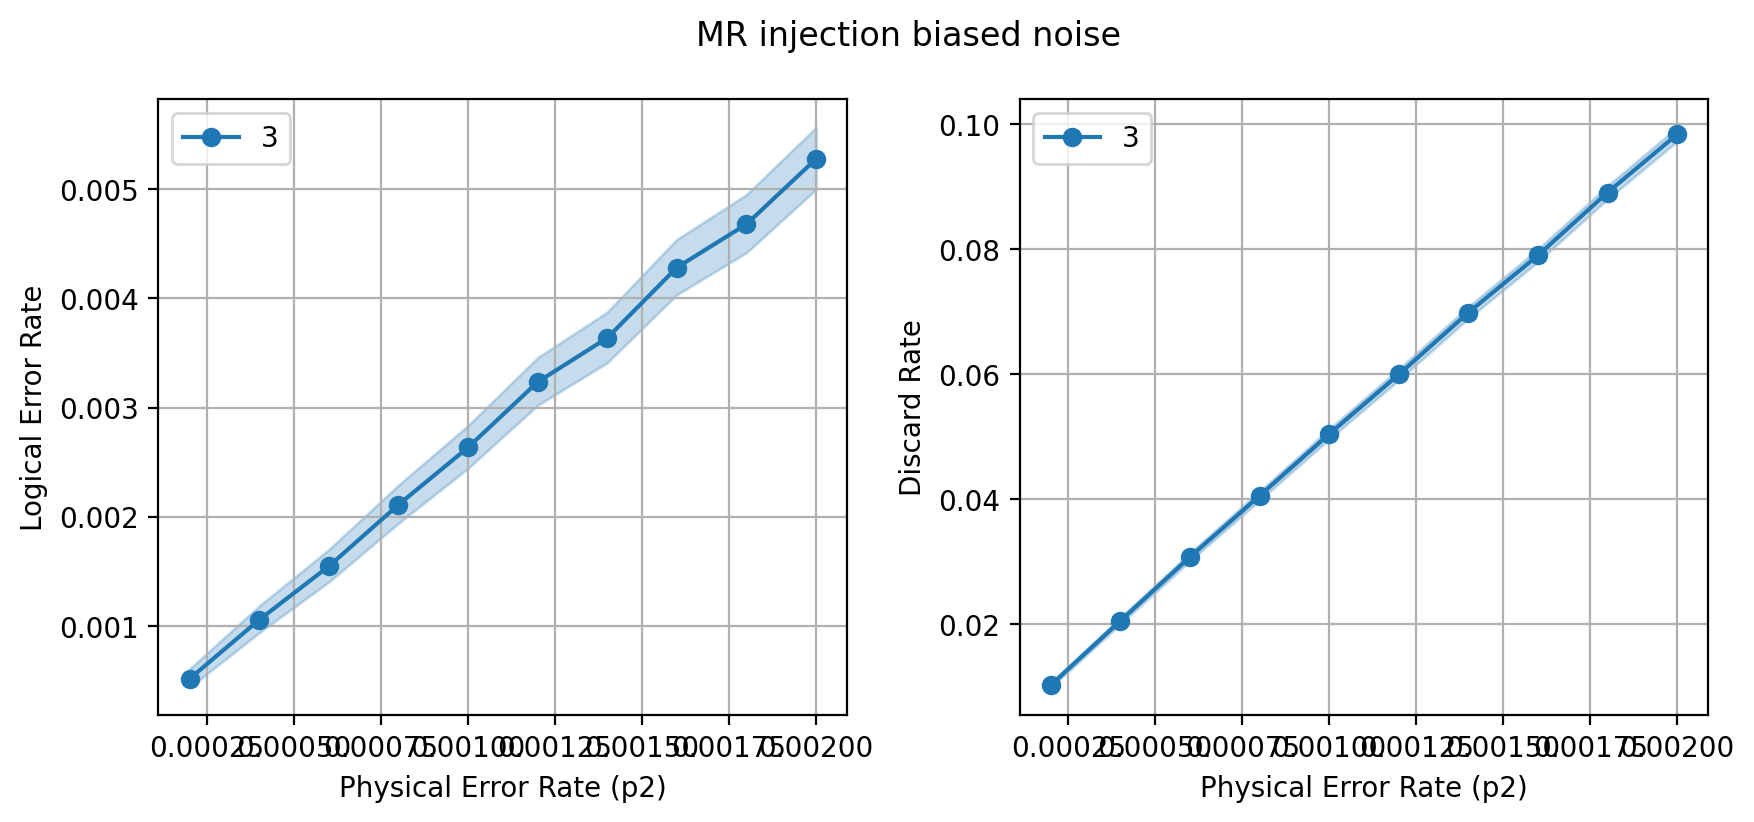

In [73]:
# circuit = write_grow_code(init_d=3, target_d=3, start='bell')
a = plot_LER_post_magic_fixed(circuit = mr_circuit_noise_str_upd_magic, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = packbits(ones(24,dtype=np.uint8)))

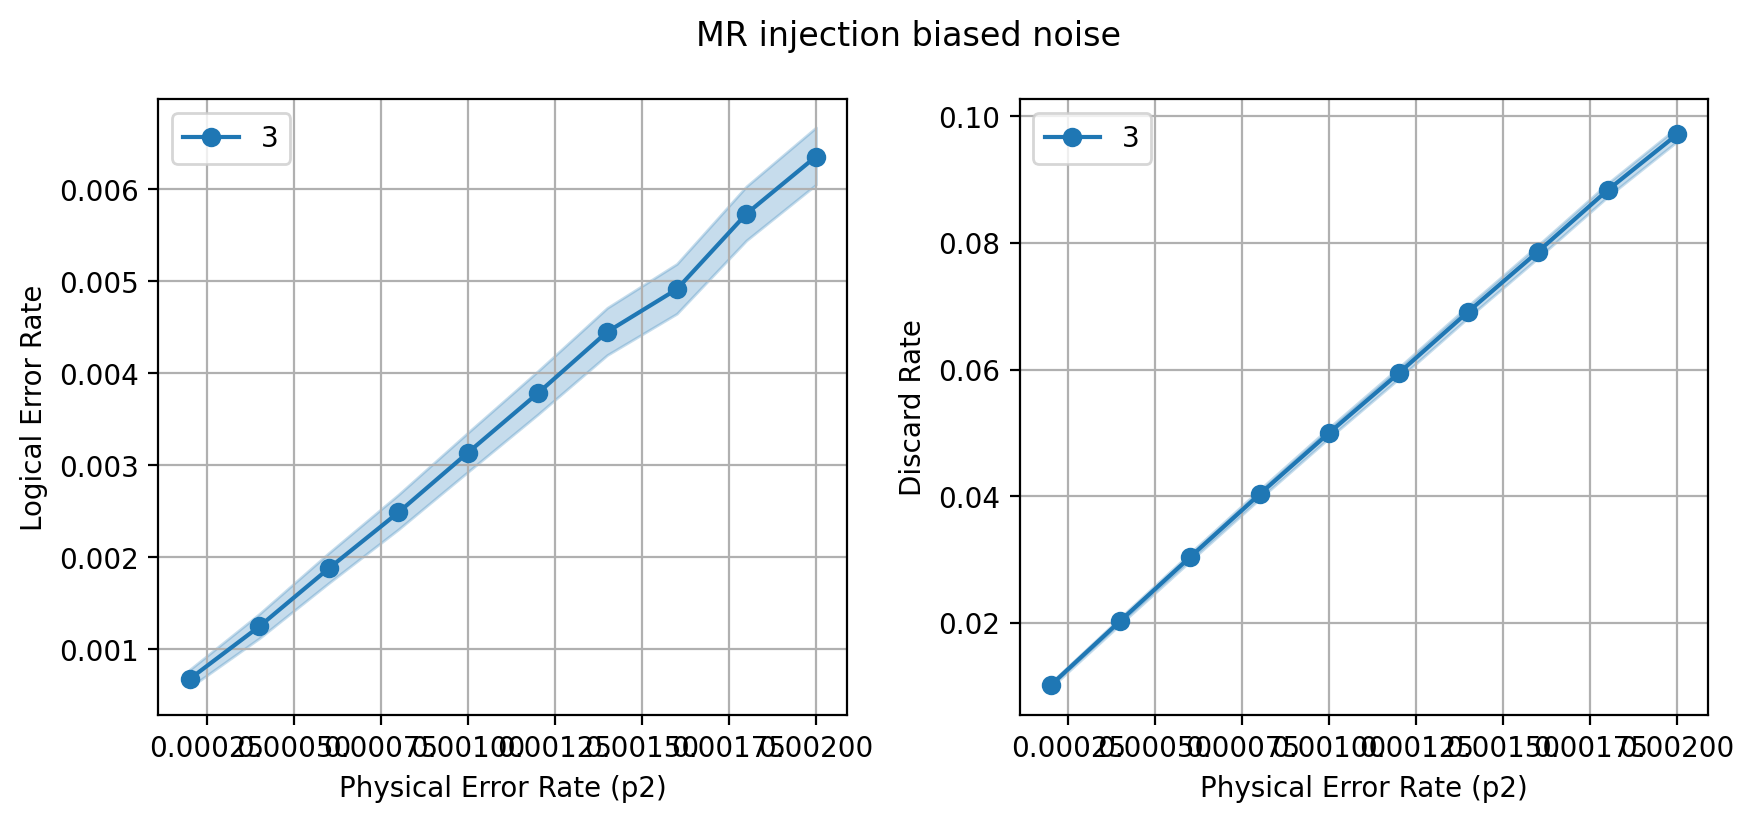

In [74]:
c = plot_LER_post_magic_fixed(circuit = cr_circuit_noise_str_upd_magic, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased', 
                             bit_packed_array_for_this_circ_dets = packbits(ones(24,dtype=np.uint8)))

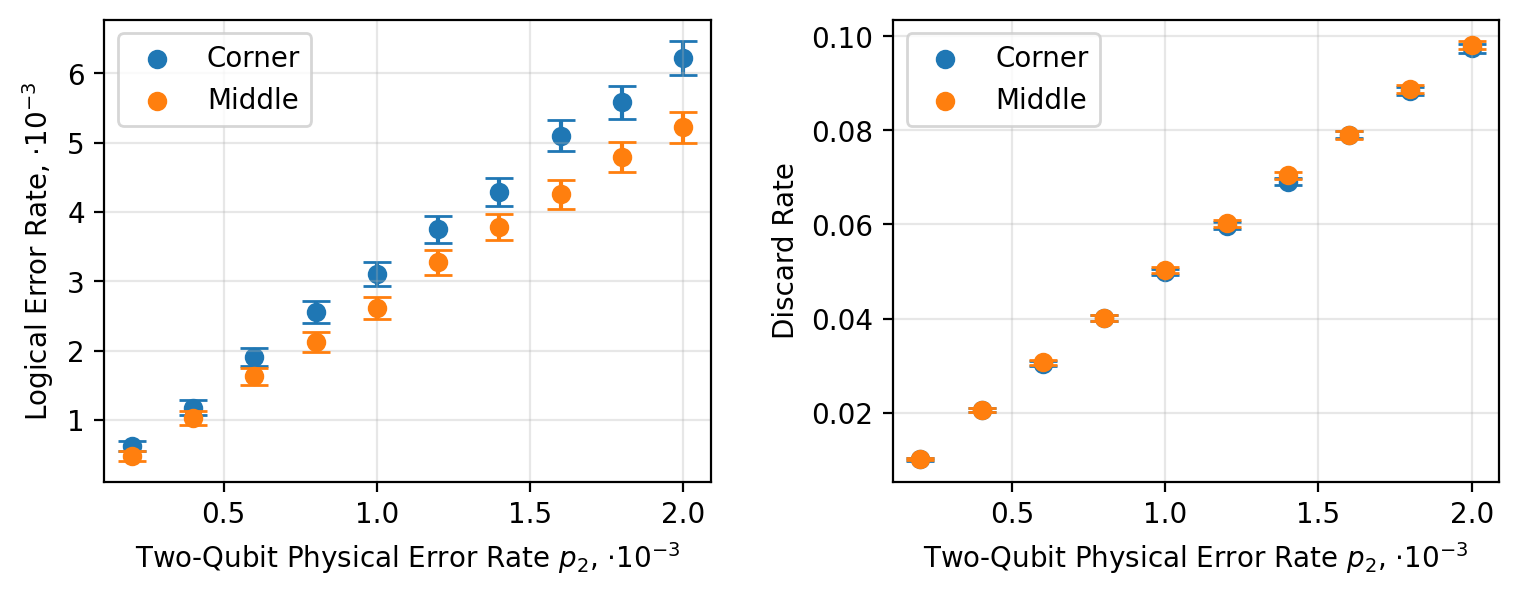

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, c))), 1e3*array(list(map(ler, c))), label='Corner', zorder=0, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, c))), 1e3*array(list(map(ler, c))), yerr=1e3*array(list(map(ler_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[0].scatter(1e3*array(list(map(probs, a))), 1e3*array(list(map(ler, a))), label='Middle', zorder=10, color='C1')
ax[0].errorbar(1e3*array(list(map(probs, a))), 1e3*array(list(map(ler, a))), yerr=1e3*array(list(map(ler_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, c))), array(list(map(discs, c))), label='Corner', zorder=0, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, c))), array(list(map(discs, c))), yerr=array(list(map(discs_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[1].scatter(1e3*array(list(map(probs, a))), array(list(map(discs, a))), label='Middle', zorder=10, color='C1')
ax[1].errorbar(1e3*array(list(map(probs, a))), array(list(map(discs, a))), yerr=array(list(map(discs_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('corner_middle_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('corner_middle_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

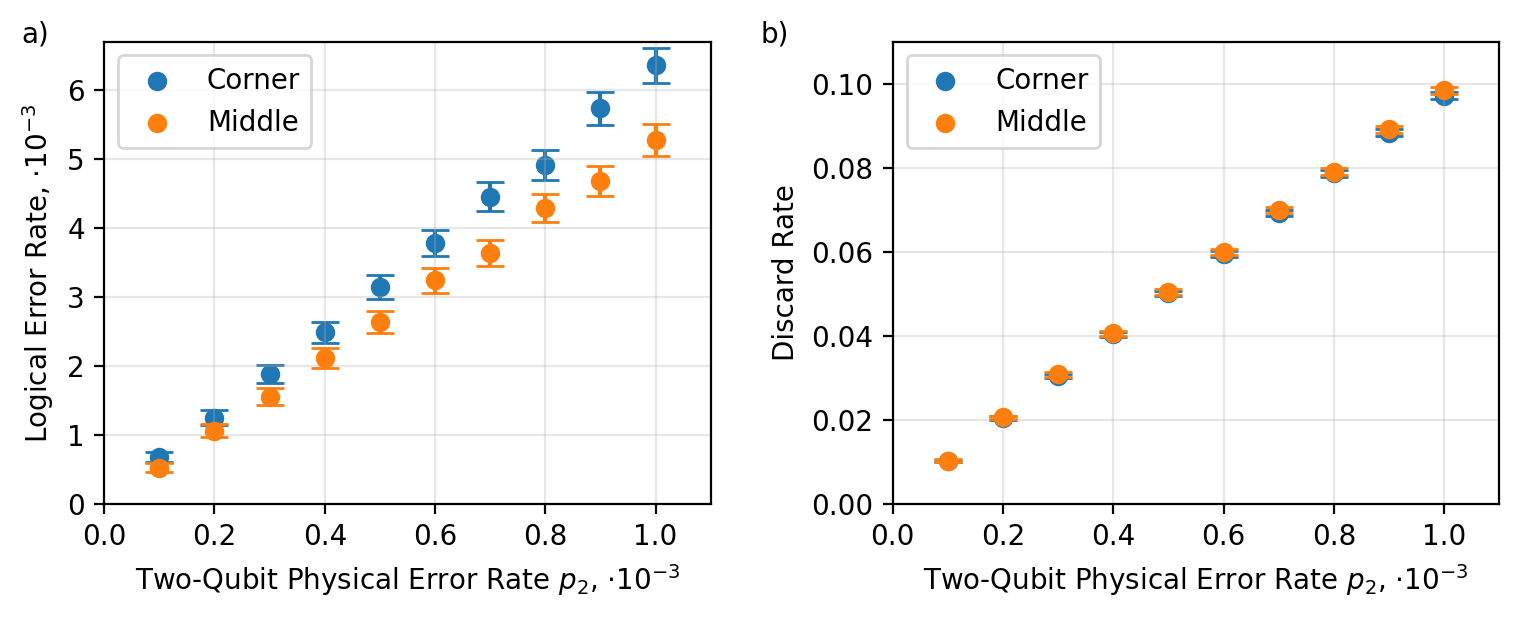

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(0.5e3*array(list(map(probs, c))), 1e3*(array(list(map(ler, c)))), label='Corner', zorder=0, color='C0')
ax[0].errorbar(0.5e3*array(list(map(probs, c))), 1e3*(array(list(map(ler, c)))), yerr=1e3*array(list(map(ler_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[0].scatter(0.5e3*array(list(map(probs, a))), 1e3*(array(list(map(ler, a)))), label='Middle', zorder=10, color='C1')
ax[0].errorbar(0.5e3*array(list(map(probs, a))), 1e3*(array(list(map(ler, a)))), yerr=1e3*array(list(map(ler_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(0.5e3*array(list(map(probs, c))), (array(list(map(discs, c)))), label='Corner', zorder=0, color='C0')
ax[1].errorbar(0.5e3*array(list(map(probs, c))), (array(list(map(discs, c)))), yerr=1*array(list(map(discs_err, c))), zorder=0, color='C0', fmt='none', capsize=5)
ax[1].scatter(0.5e3*array(list(map(probs, a))), (array(list(map(discs, a)))), label='Middle', zorder=10, color='C1')
ax[1].errorbar(0.5e3*array(list(map(probs, a))), (array(list(map(discs, a)))), yerr=1*array(list(map(discs_err, a))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
ax[0].set_ylim(0,6.7)
ax[1].set_xlim(0,1.1)
# ax[1].set_yticks([0,0.05,0.1,0.15,0.2])
fig.set_dpi(200)  # Show it bigger
ax[0].text(-0.15,6.7,'a)')
ax[1].text(-0.24,0.11,'b)')
show()
# fig.savefig('corner_middle_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('corner_middle_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

## Bell vs single

In [18]:
init_d = 3
shift_qubits = 100
shift_coord = 15
test_circuit = stim.Circuit(write_injection_bell_code(init_d=init_d, repeats=1, shift_coord=shift_coord, shift_qubits=shift_qubits))
dem = test_circuit.detector_error_model()
# test_circuit.without_noise().diagram("timeslice-svg")

In [19]:
init_d = 3
shift_qubits = 100
shift_coord = 15
circuit = write_injection_bell_code(init_d=init_d, repeats=1, shift_coord=shift_coord, shift_qubits=shift_qubits)

bitmask_det = bitmask_for_postselection_bell(circuit, circuit)
bell = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)

In [20]:
init_d = 3
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
nobell = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)

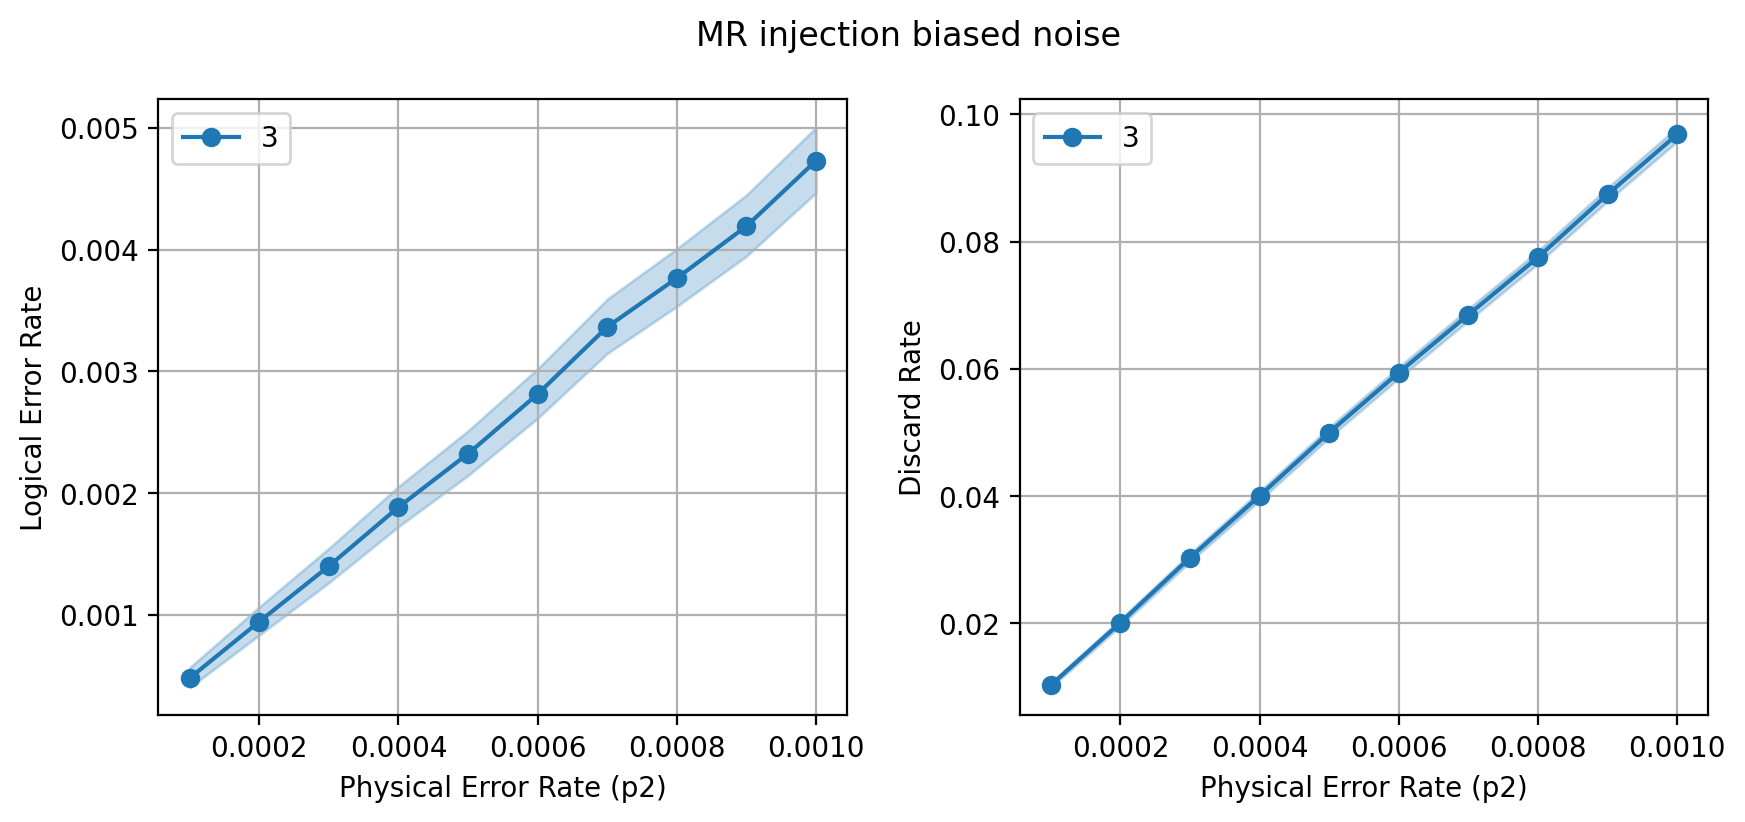

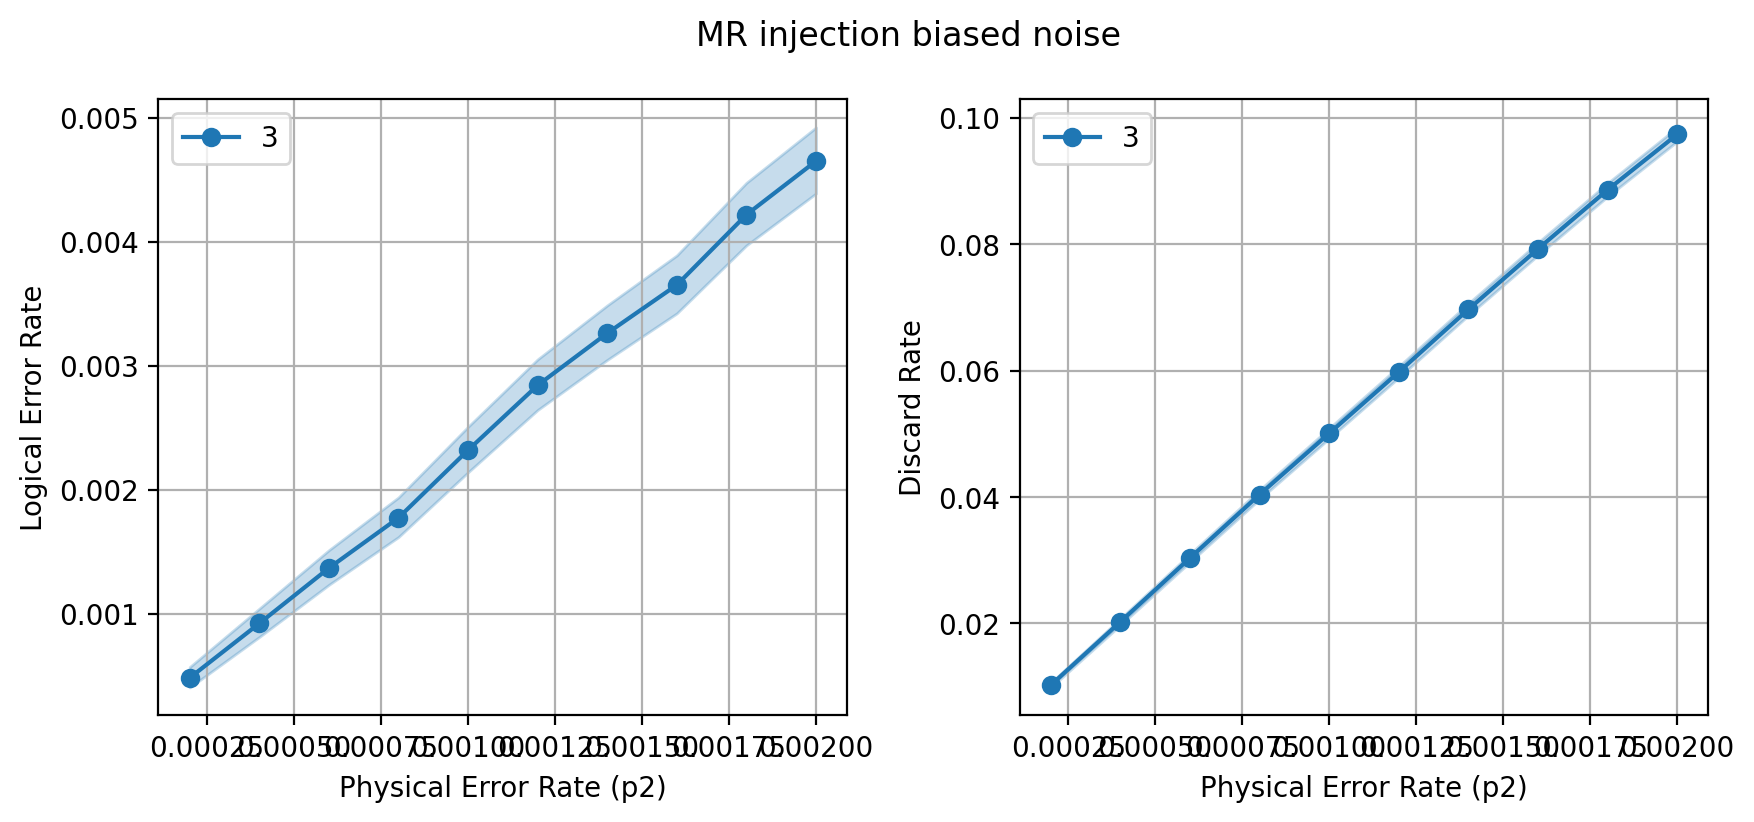

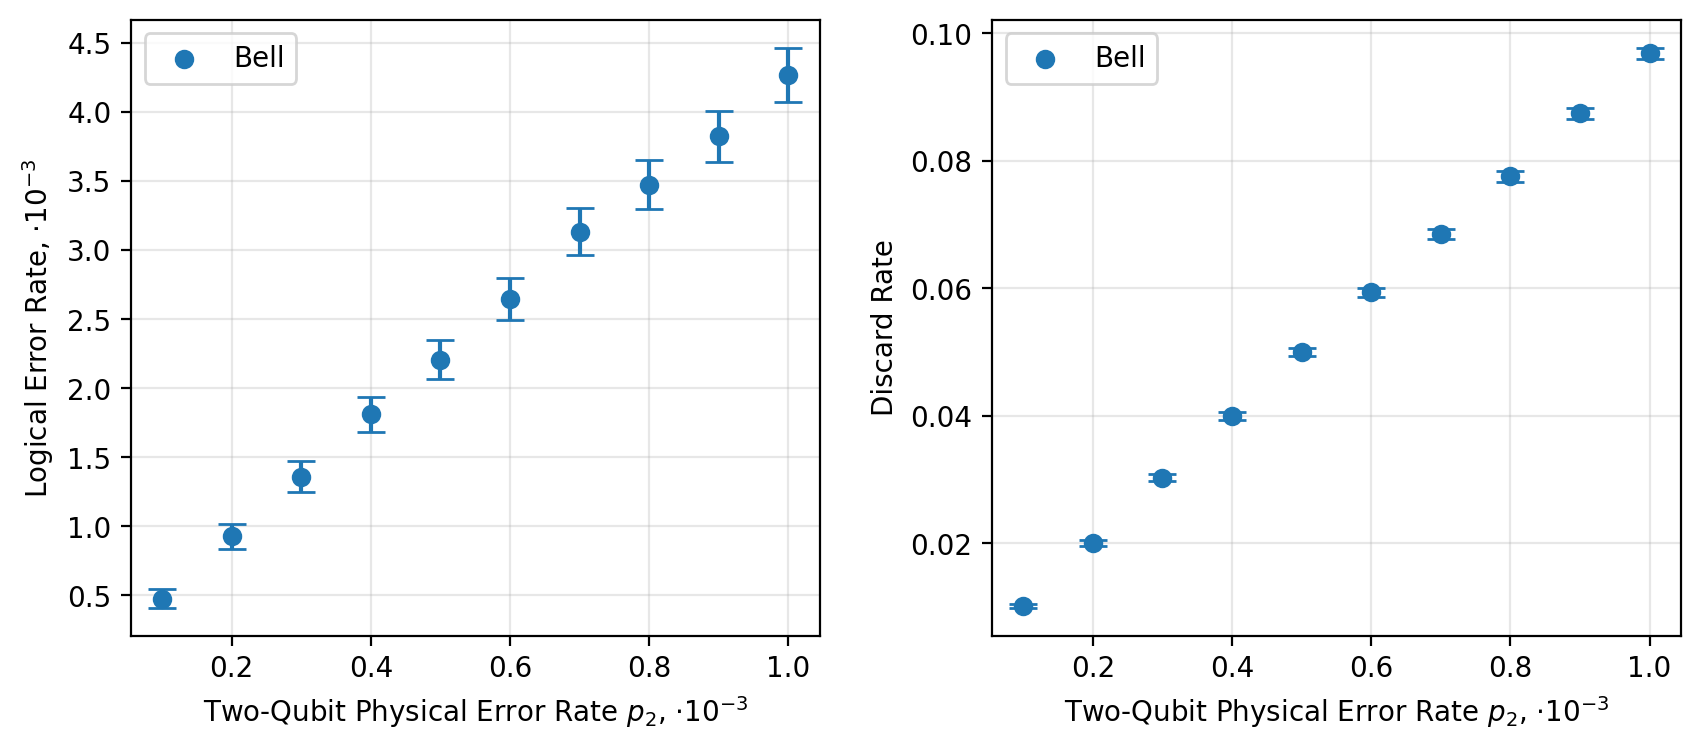

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.25)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
# ax[0].scatter(1e3*array(list(map(probs, d))), 1e3*bell_error_v0(array(list(map(ler, d)))), label='$2p-p^2$', zorder=10, color='C1')
# ax[0].errorbar(1e3*array(list(map(probs, d))), 1e3*bell_error_v0(array(list(map(ler, d)))), yerr=2e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
# ax[1].scatter(1e3*array(list(map(probs, d))), bell_error_v0(array(list(map(discs, d)))), label='$2p-p^2$', zorder=10, color='C1')
# ax[1].errorbar(1e3*array(list(map(probs, d))), bell_error_v0(array(list(map(discs, d)))), yerr=2*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_1.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_1.pdf', transparent=True, dpi=600, bbox_inches='tight')

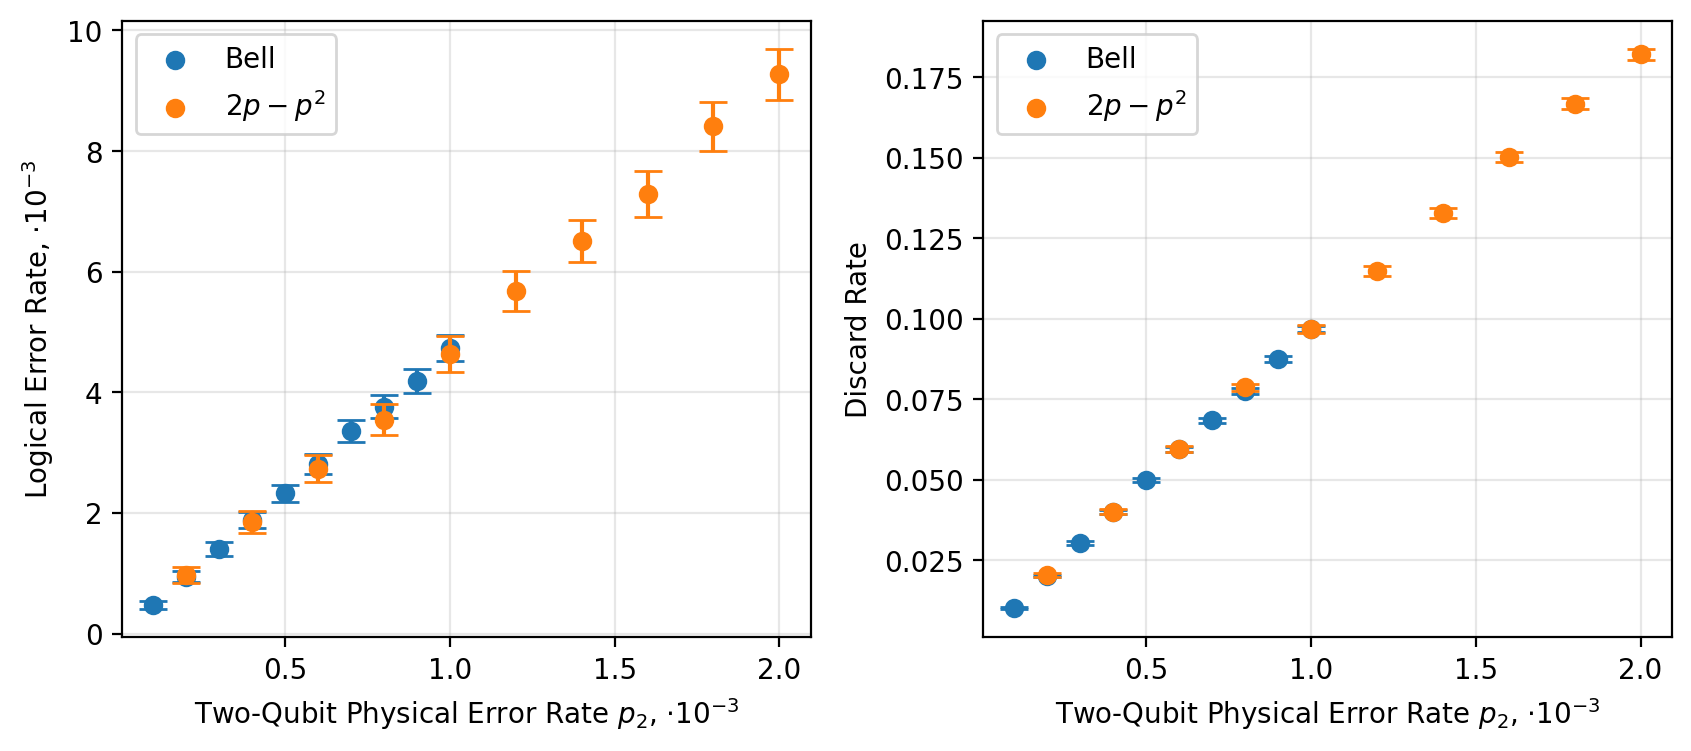

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.25)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(1e3*array(list(map(probs, d))), 1e3*bell_error(array(list(map(ler, d)))), label='$2p-p^2$', zorder=10, color='C1')
ax[0].errorbar(1e3*array(list(map(probs, d))), 1e3*bell_error(array(list(map(ler, d)))), yerr=2e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(1e3*array(list(map(probs, d))), bell_error(array(list(map(discs, d)))), label='$2p-p^2$', zorder=10, color='C1')
ax[1].errorbar(1e3*array(list(map(probs, d))), bell_error(array(list(map(discs, d)))), yerr=2*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_2.pdf', transparent=True, dpi=600, bbox_inches='tight')

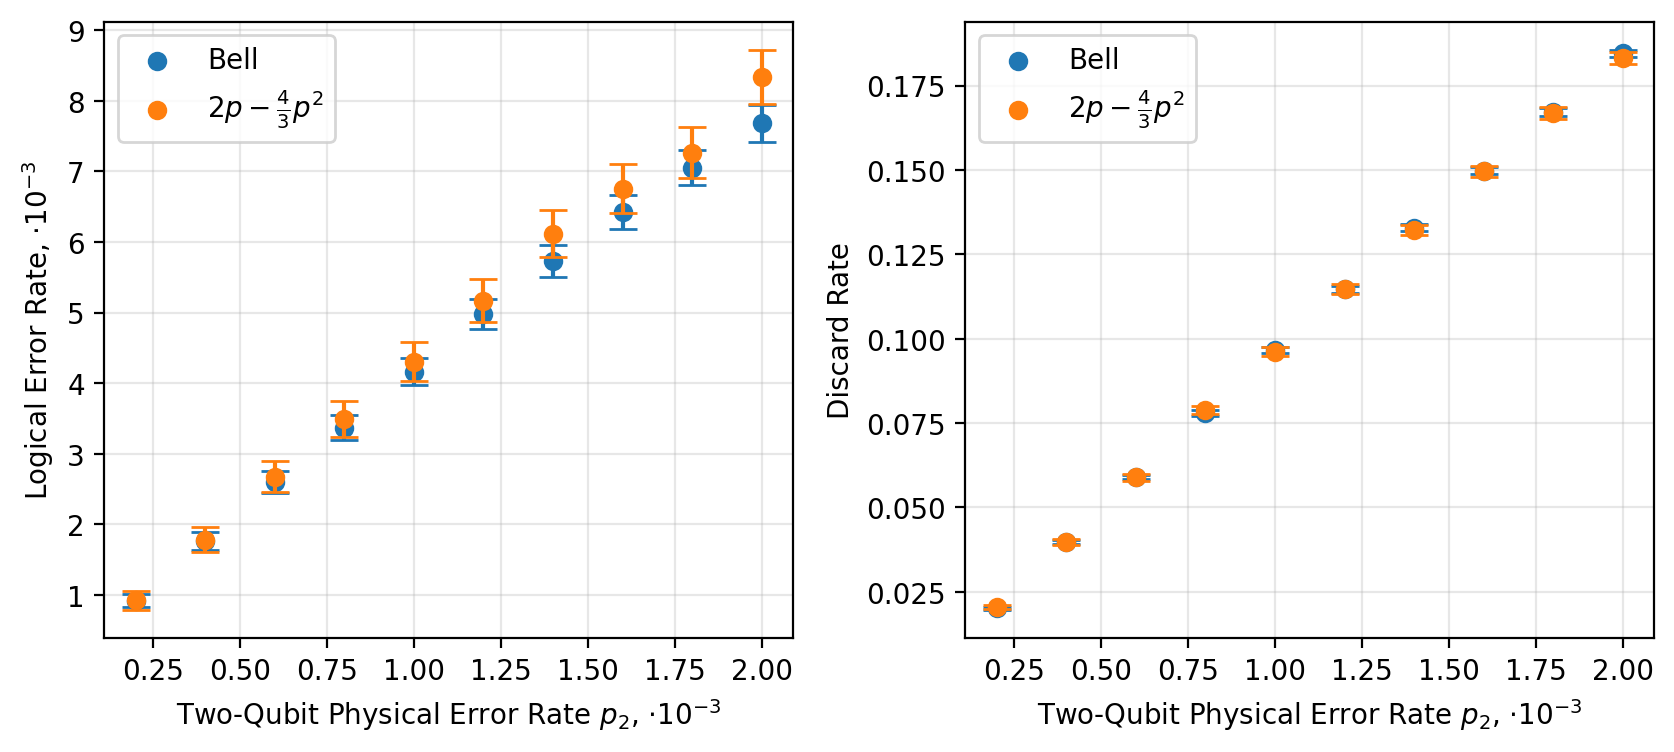

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
# figsize=(9,3)
plt.subplots_adjust(wspace=0.25)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(1e3*array(list(map(probs, d))), 1e3*bell_error(array(list(map(ler, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[0].errorbar(1e3*array(list(map(probs, d))), 1e3*bell_error(array(list(map(ler, d)))), yerr=2e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(1e3*array(list(map(probs, d))), bell_error(array(list(map(discs, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[1].errorbar(1e3*array(list(map(probs, d))), bell_error(array(list(map(discs, d)))), yerr=2*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_3.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_3.pdf', transparent=True, dpi=600, bbox_inches='tight')

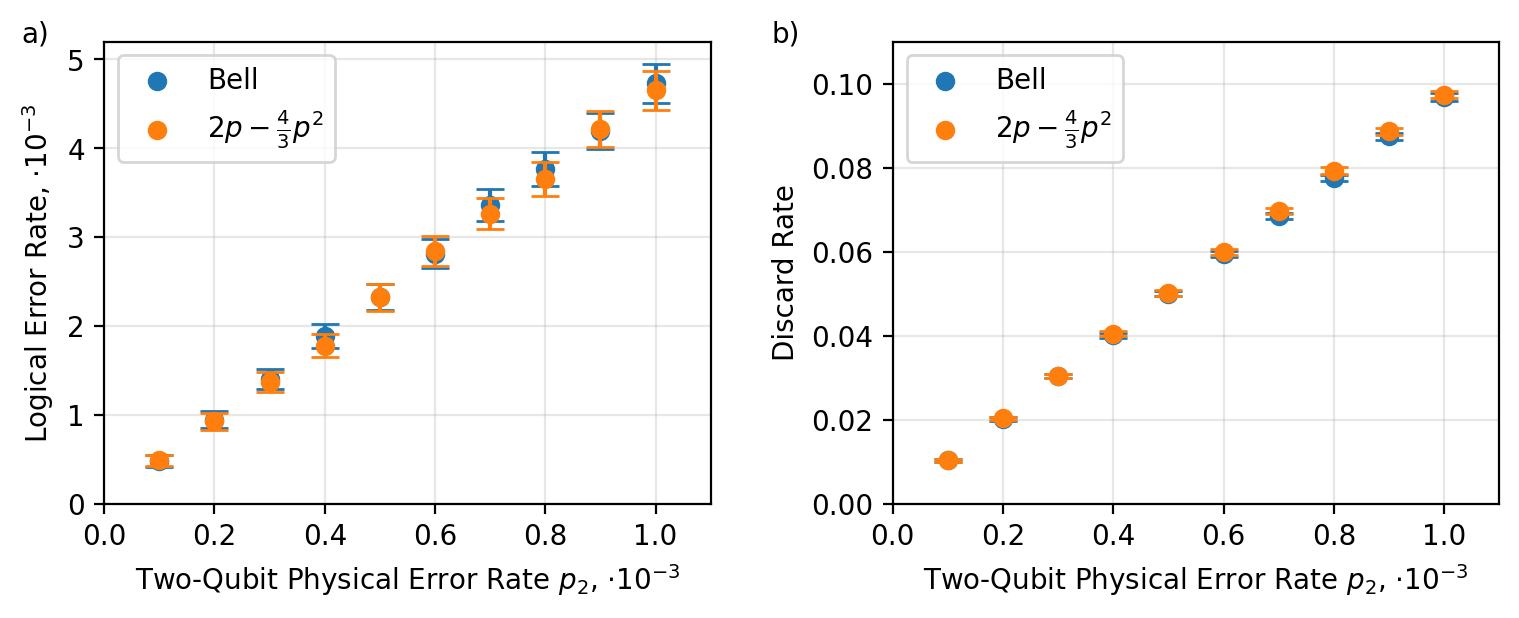

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
# figsize=(9,3)
plt.subplots_adjust(wspace=0.3)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(0.5e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[0].errorbar(0.5e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), yerr=1e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(0.5e3*array(list(map(probs, d))), (array(list(map(discs, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[1].errorbar(0.5e3*array(list(map(probs, d))), (array(list(map(discs, d)))), yerr=1*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
ax[0].set_ylim(0,5.2)
ax[1].set_xlim(0,1.1)
ax[0].text(-0.15,5.2,'a)')
ax[1].text(-0.22,0.11,'b)')
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

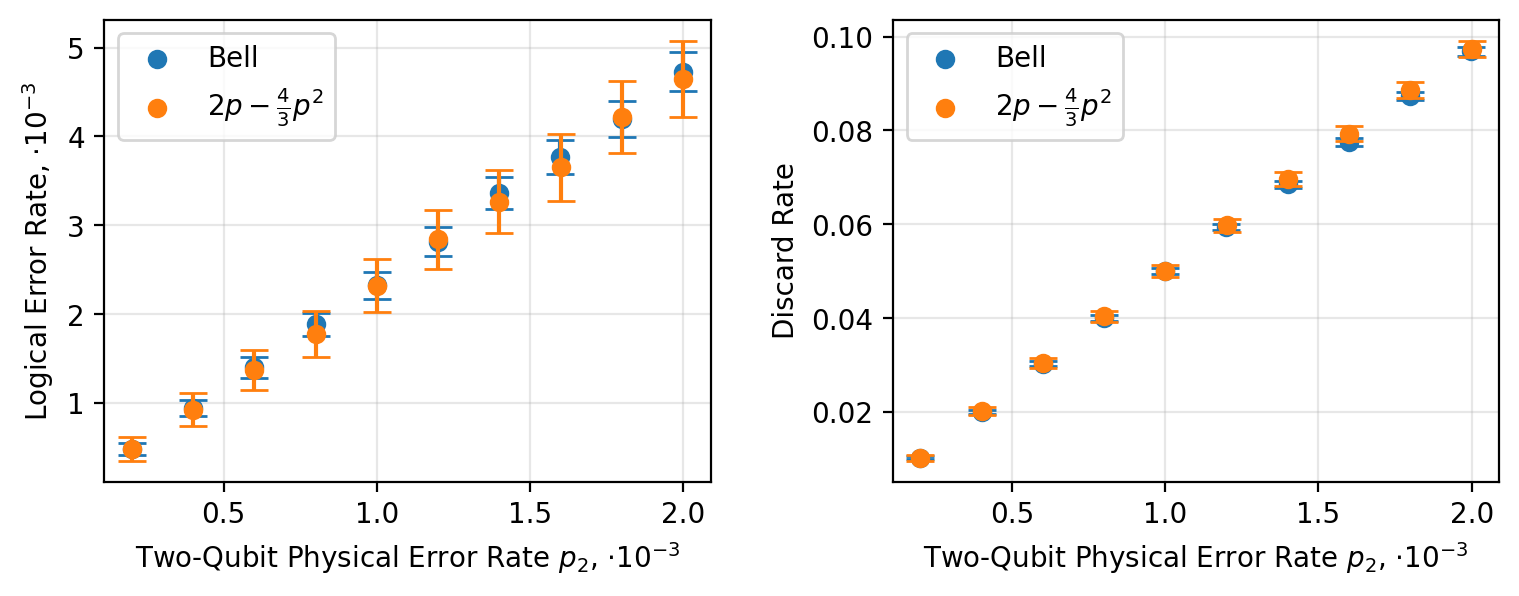

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
# figsize=(9,3)
plt.subplots_adjust(wspace=0.3)

b = bell
d = nobell

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*bell_error(array(list(map(probs, b)))), 1e3*array(list(map(ler, b))), label='Bell', zorder=10, color='C0')
ax[0].errorbar(1e3*bell_error(array(list(map(probs, b)))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(1e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[0].errorbar(1e3*array(list(map(probs, d))), 1e3*(array(list(map(ler, d)))), yerr=2e3*array(list(map(ler_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

ax[1].scatter(1e3*bell_error(array(list(map(probs, b)))), array(list(map(discs, b))), label='Bell', zorder=10, color='C0')
ax[1].errorbar(1e3*bell_error(array(list(map(probs, b)))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(1e3*array(list(map(probs, d))), (array(list(map(discs, d)))), label='$2p-\\frac{4}{3}p^2$', zorder=10, color='C1')
ax[1].errorbar(1e3*array(list(map(probs, d))), (array(list(map(discs, d)))), yerr=2*array(list(map(discs_err, d))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].legend()
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('bell_single_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('bell_single_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

---

## Injection in different d

In [37]:
inj = []

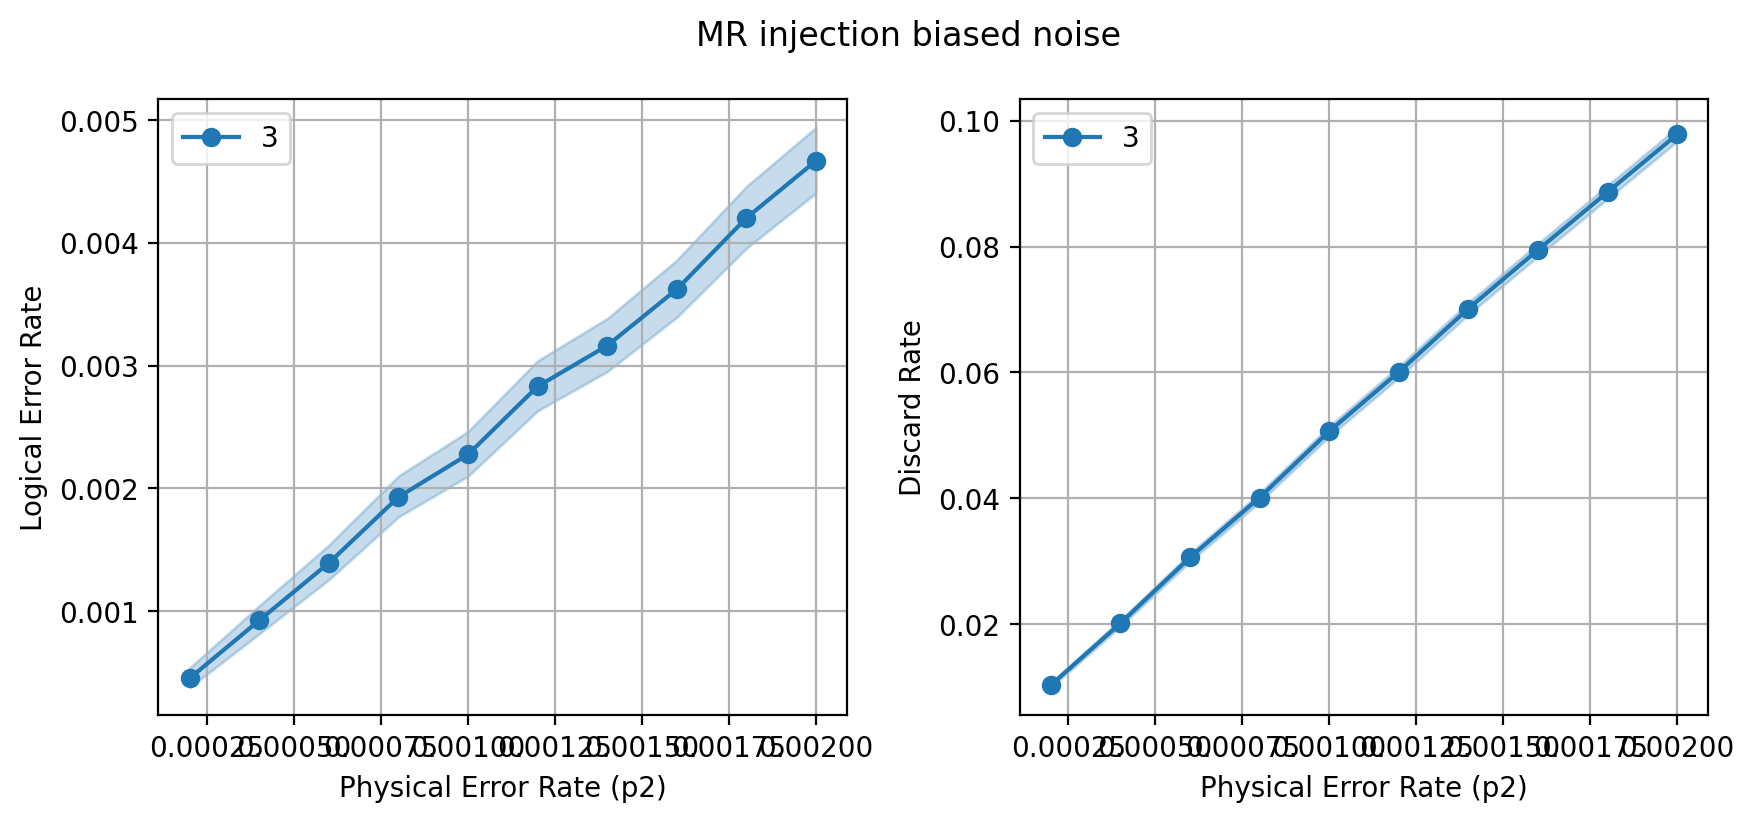

In [39]:
init_d = 3
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

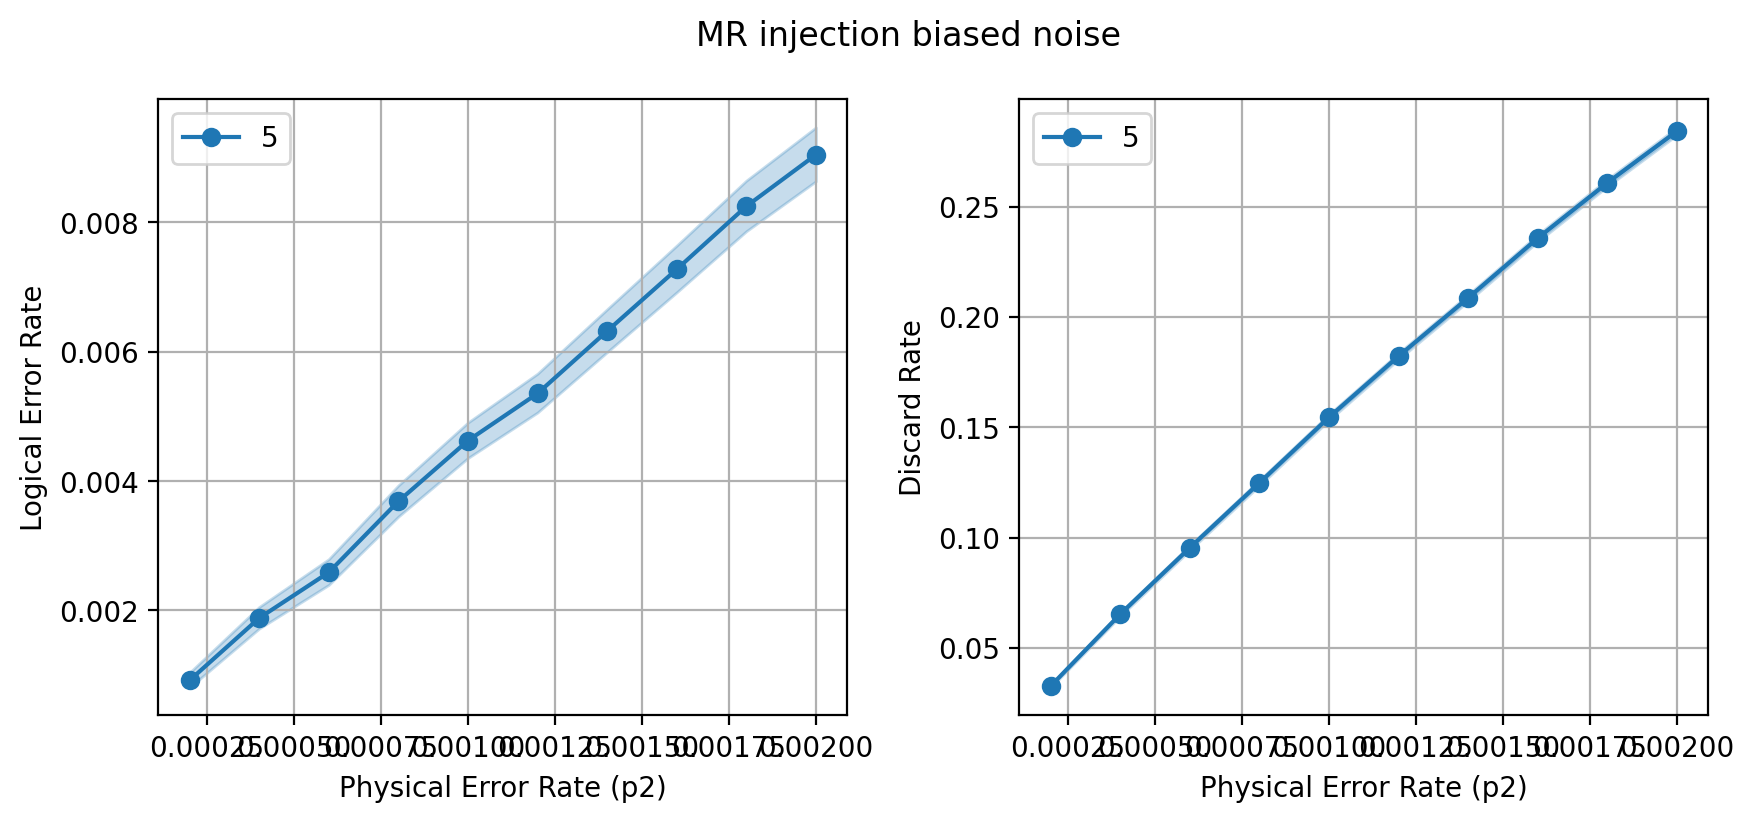

In [40]:
init_d = 5
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

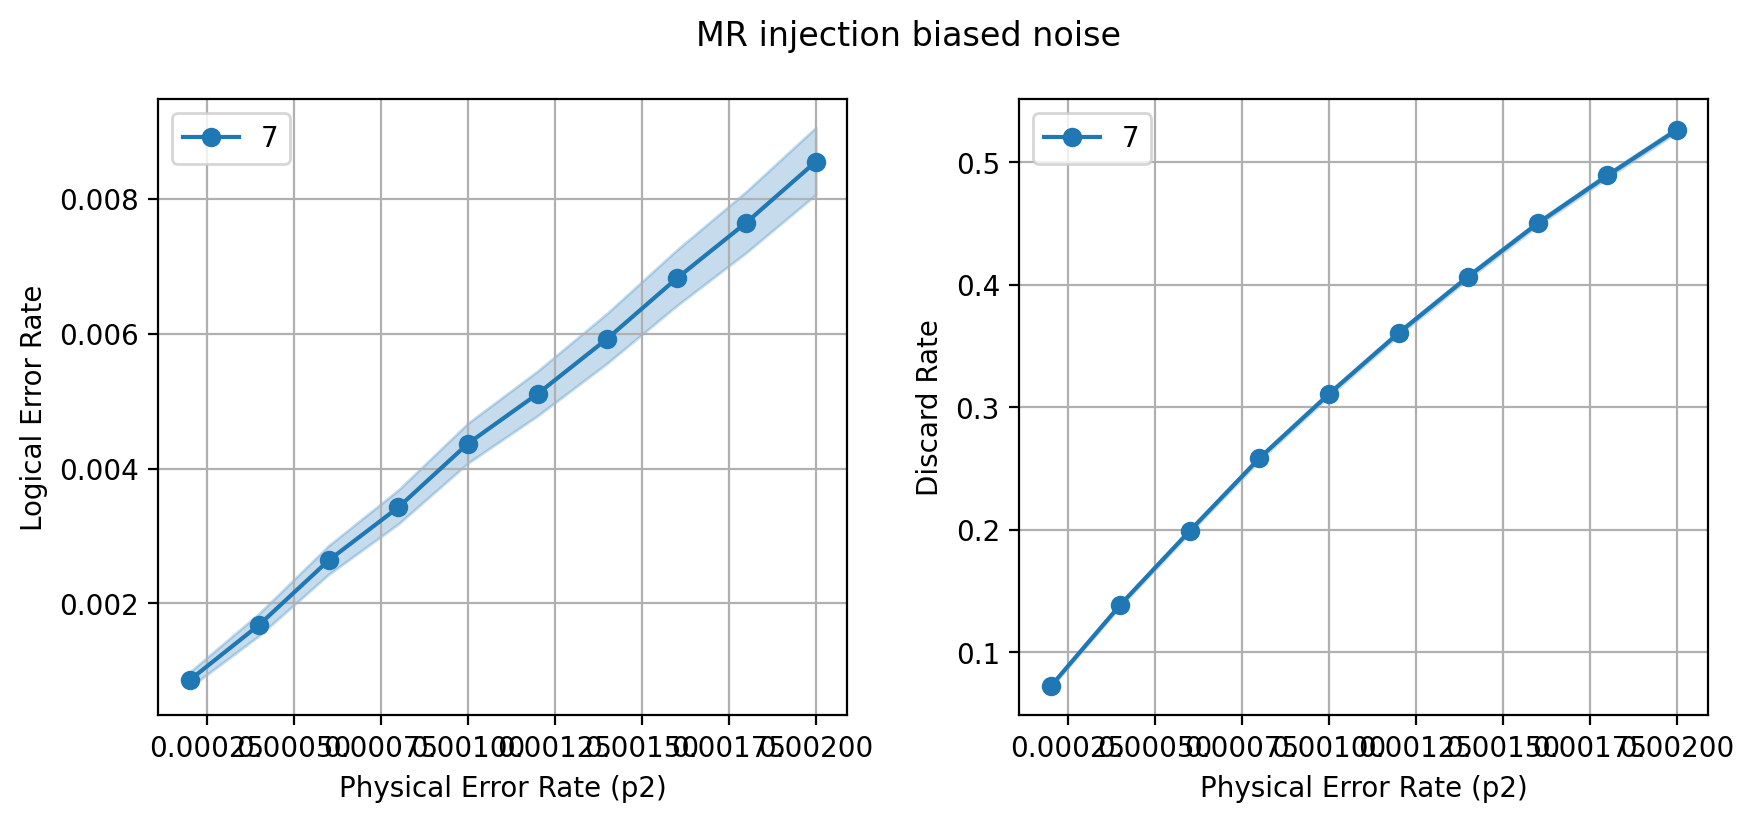

In [42]:
init_d = 7
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

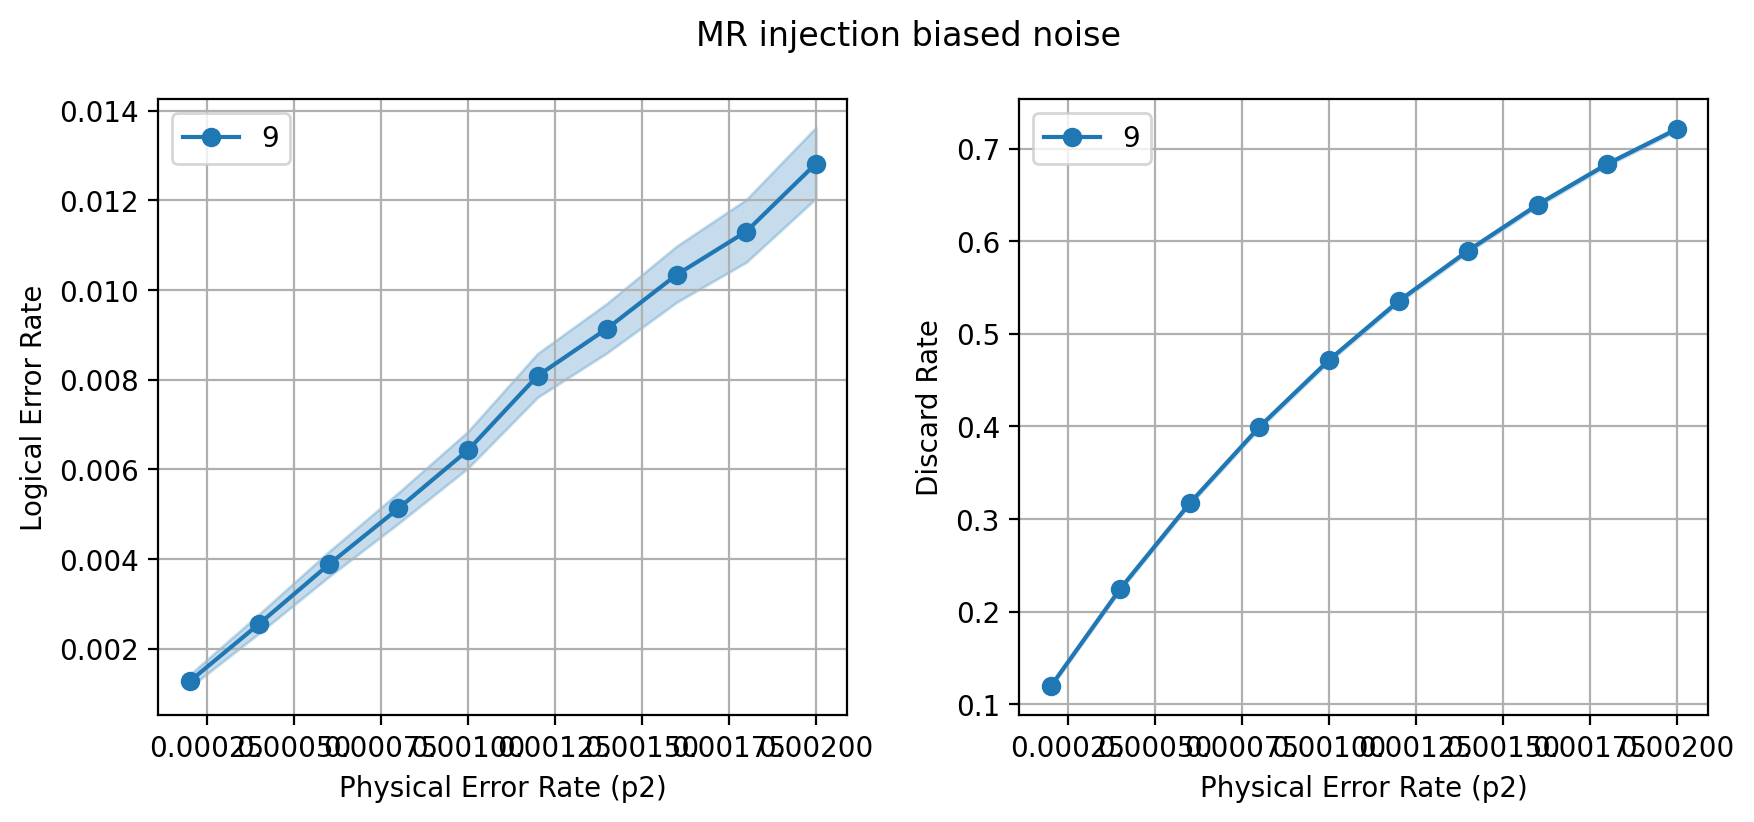

In [44]:
init_d = 9
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

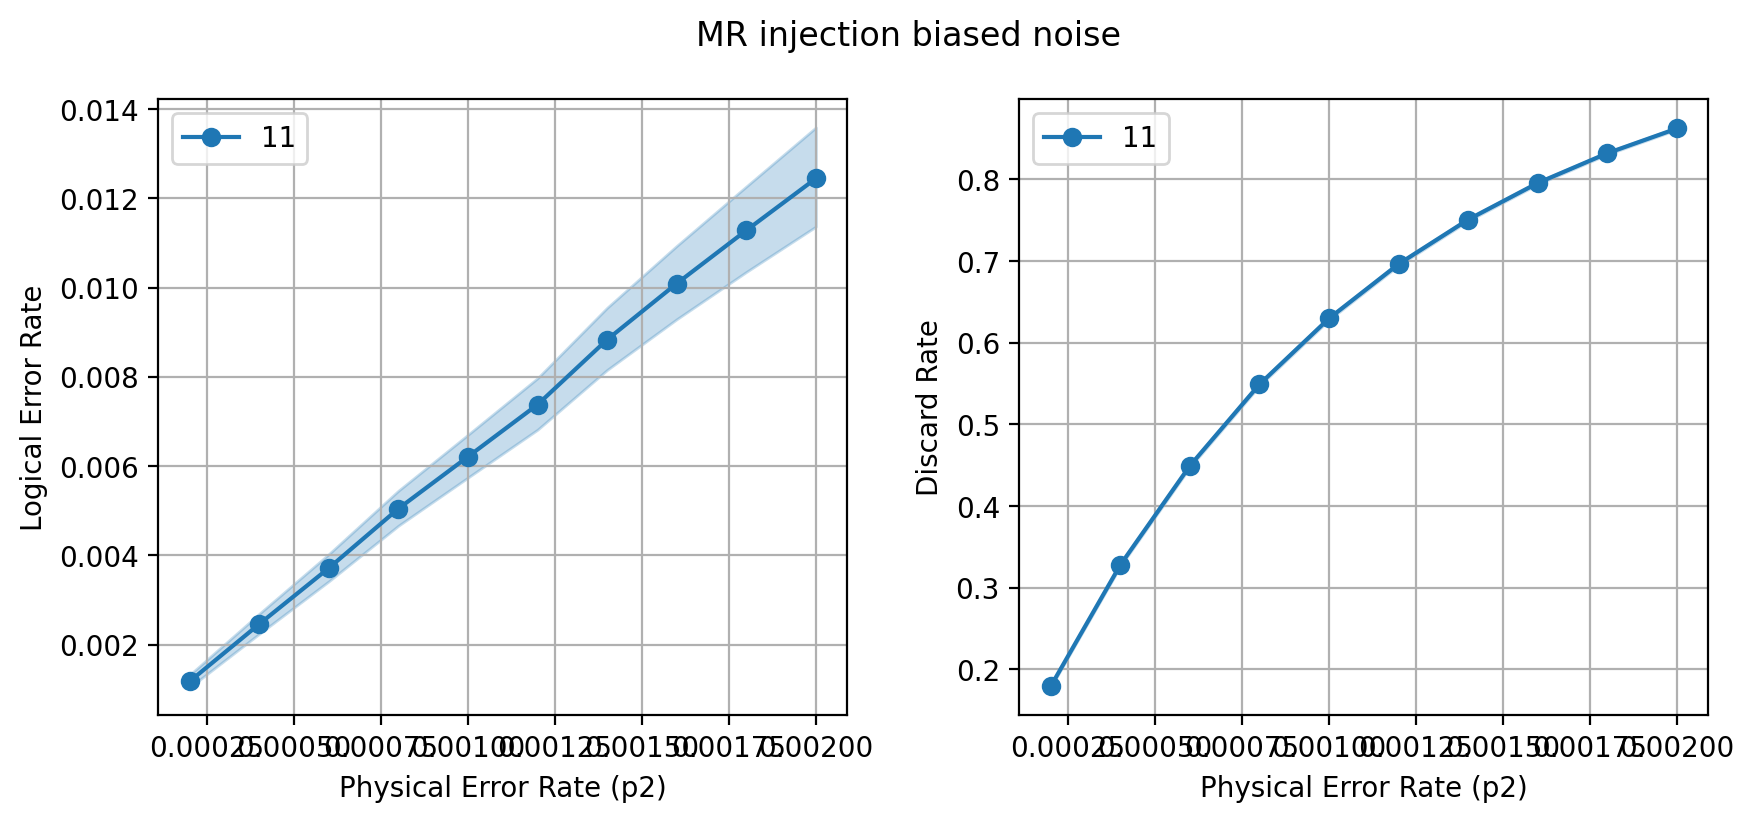

In [45]:
init_d = 11
circuit = write_injection_code(init_d, repeats=1)
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
inj.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.2,2,10)*1e-3, filename='stats11.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))
show()

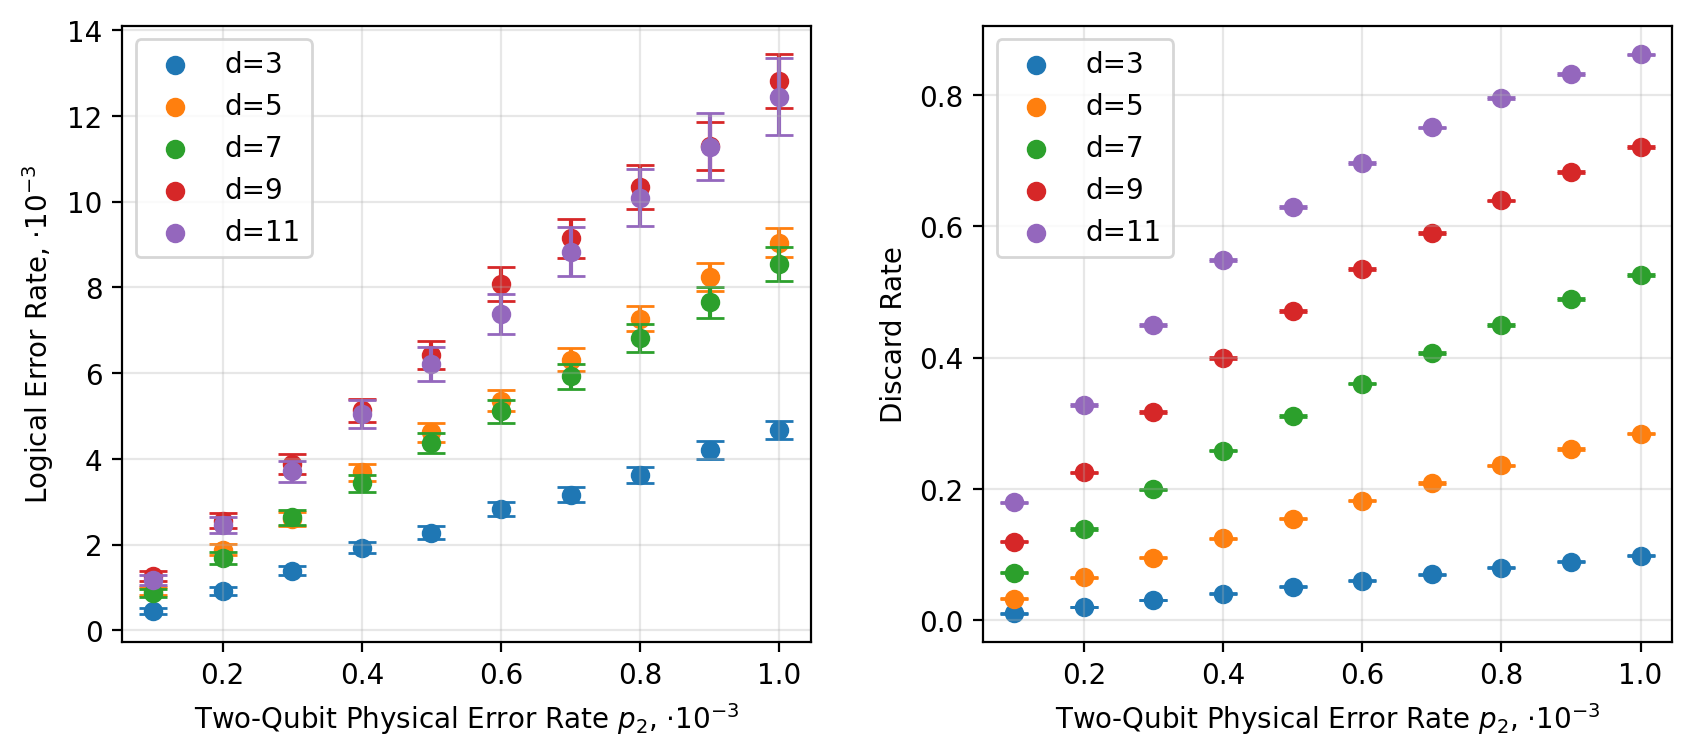

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.25)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']
# len(inj)
dmax = 5
for i in range(dmax):
    b = inj[i]
    ax[0].scatter(0.5e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[0].errorbar(0.5e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)
    
    ax[1].scatter(0.5e3*array(list(map(probs, b))), array(list(map(discs, b))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[1].errorbar(0.5e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
# ax[0].set_ylim(0, 4.2)
ax[0].legend(loc='upper left')
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend(loc='upper left')
# ax[1].set_ylim(-0.01, 0.65)
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig(f'injection_d_{dmax}.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'injection_d_{dmax}.pdf', transparent=True, dpi=600, bbox_inches='tight')

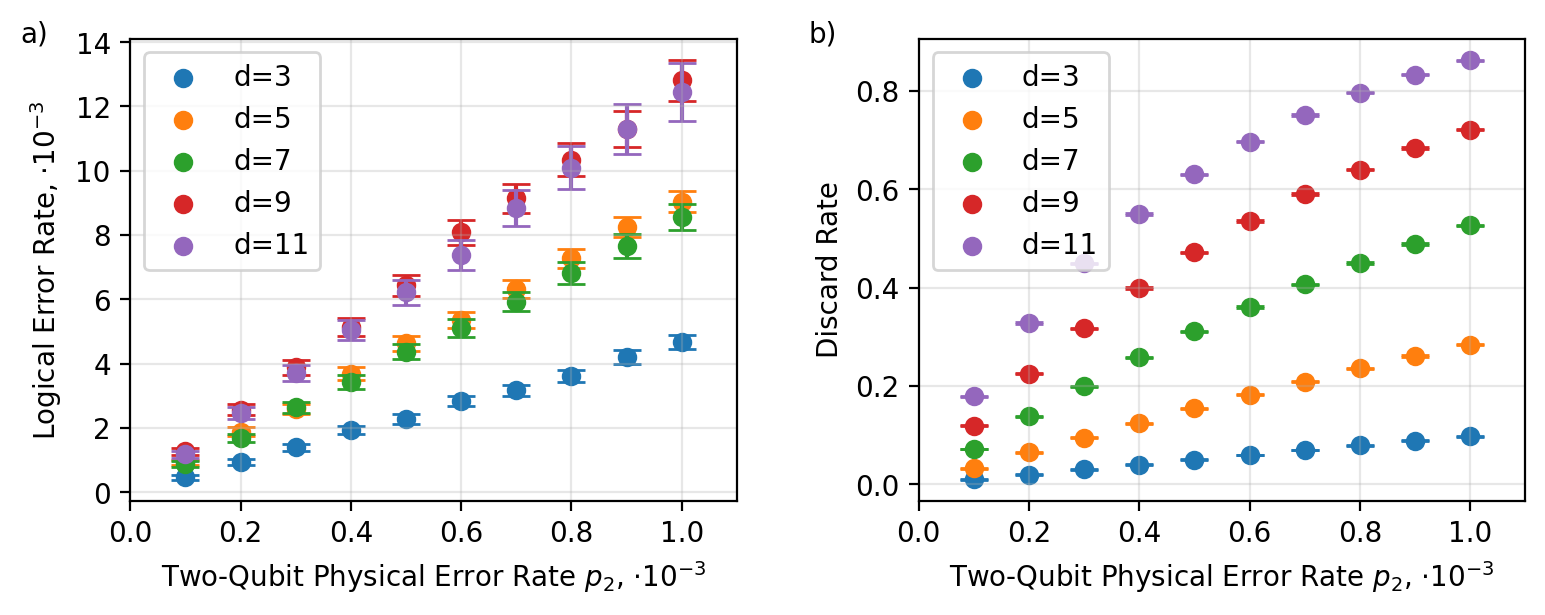

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']
# len(inj)
dmax = 5
for i in range(dmax):
    b = inj[i]
    ax[0].scatter(0.5e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[0].errorbar(0.5e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), yerr=1e3*array(list(map(ler_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)
    
    ax[1].scatter(0.5e3*array(list(map(probs, b))), (array(list(map(discs, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[1].errorbar(0.5e3*array(list(map(probs, b))), (array(list(map(discs, b)))), yerr=1*array(list(map(discs_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
# ax[0].set_ylim(0, 10)
ax[0].legend(loc='upper left')
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend(loc='upper left')
# ax[1].set_ylim(-0.01, 0.7)
fig.set_dpi(200)  # Show it bigger
# ax[1].set_ylim(0,0.11)
ax[0].set_xlim(0,1.1)
# ax[0].set_ylim(0,6.2)
ax[1].set_xlim(0,1.1)
ax[0].text(-0.2,14,'a)')
ax[1].text(-0.2,0.9,'b)')
show()
# fig.savefig(f'injection_d_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'injection_d_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

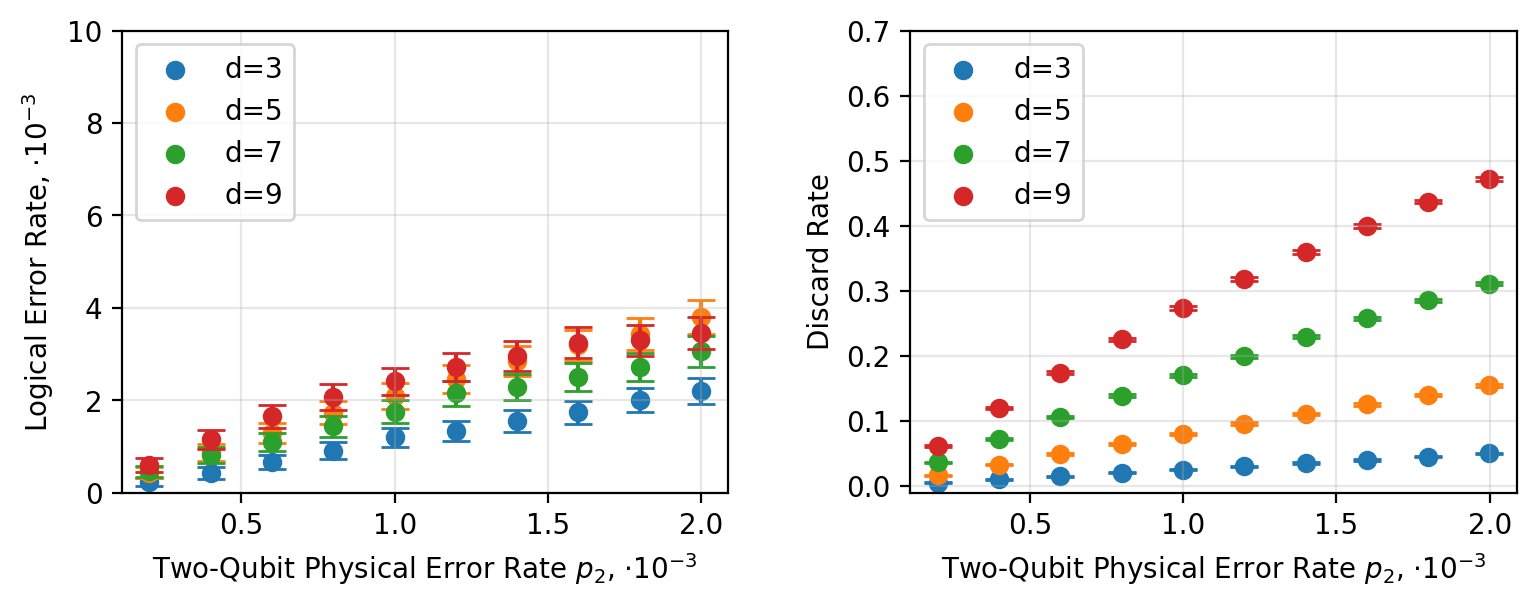

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.3)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']
# len(inj)
dmax = 4
for i in range(dmax):
    b = inj[i]
    ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*(array(list(map(ler, b)))), yerr=2e3*array(list(map(ler_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)
    
    ax[1].scatter(1e3*array(list(map(probs, b))), (array(list(map(discs, b)))), label=f'd={i*2+3}', zorder=1, color=f'C{i}')
    ax[1].errorbar(1e3*array(list(map(probs, b))), (array(list(map(discs, b)))), yerr=2*array(list(map(discs_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
ax[0].set_ylim(0, 10)
ax[0].legend(loc='upper left')
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend(loc='upper left')
ax[1].set_ylim(-0.01, 0.7)
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig(f'injection_d_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'injection_d_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

## LER DR trade-off

In [122]:
growing = []

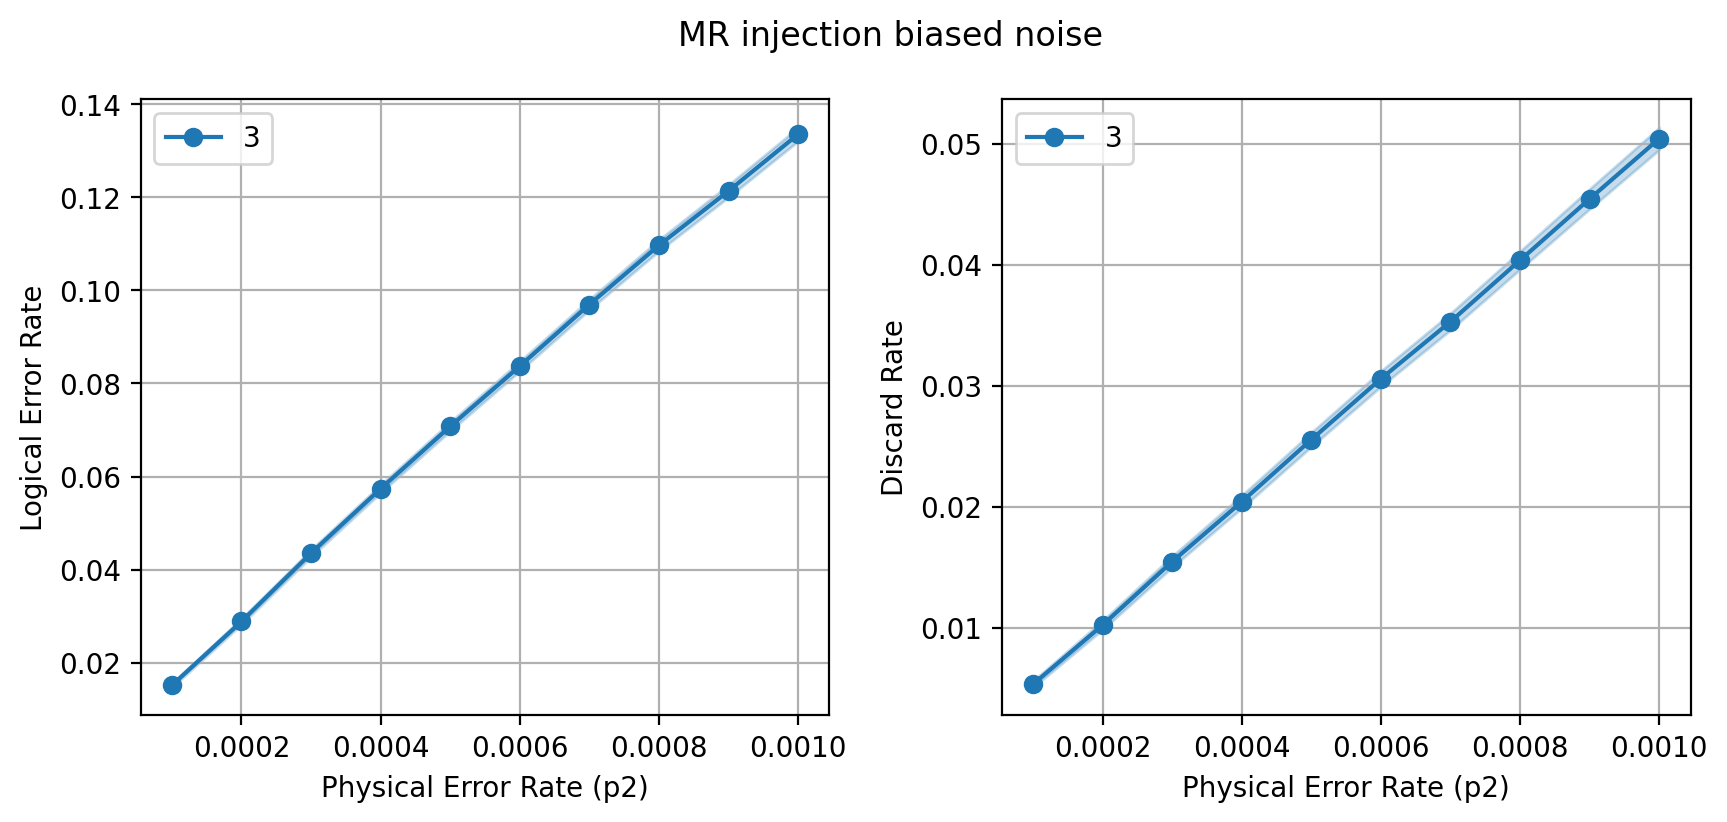

In [124]:
init_d = 3
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

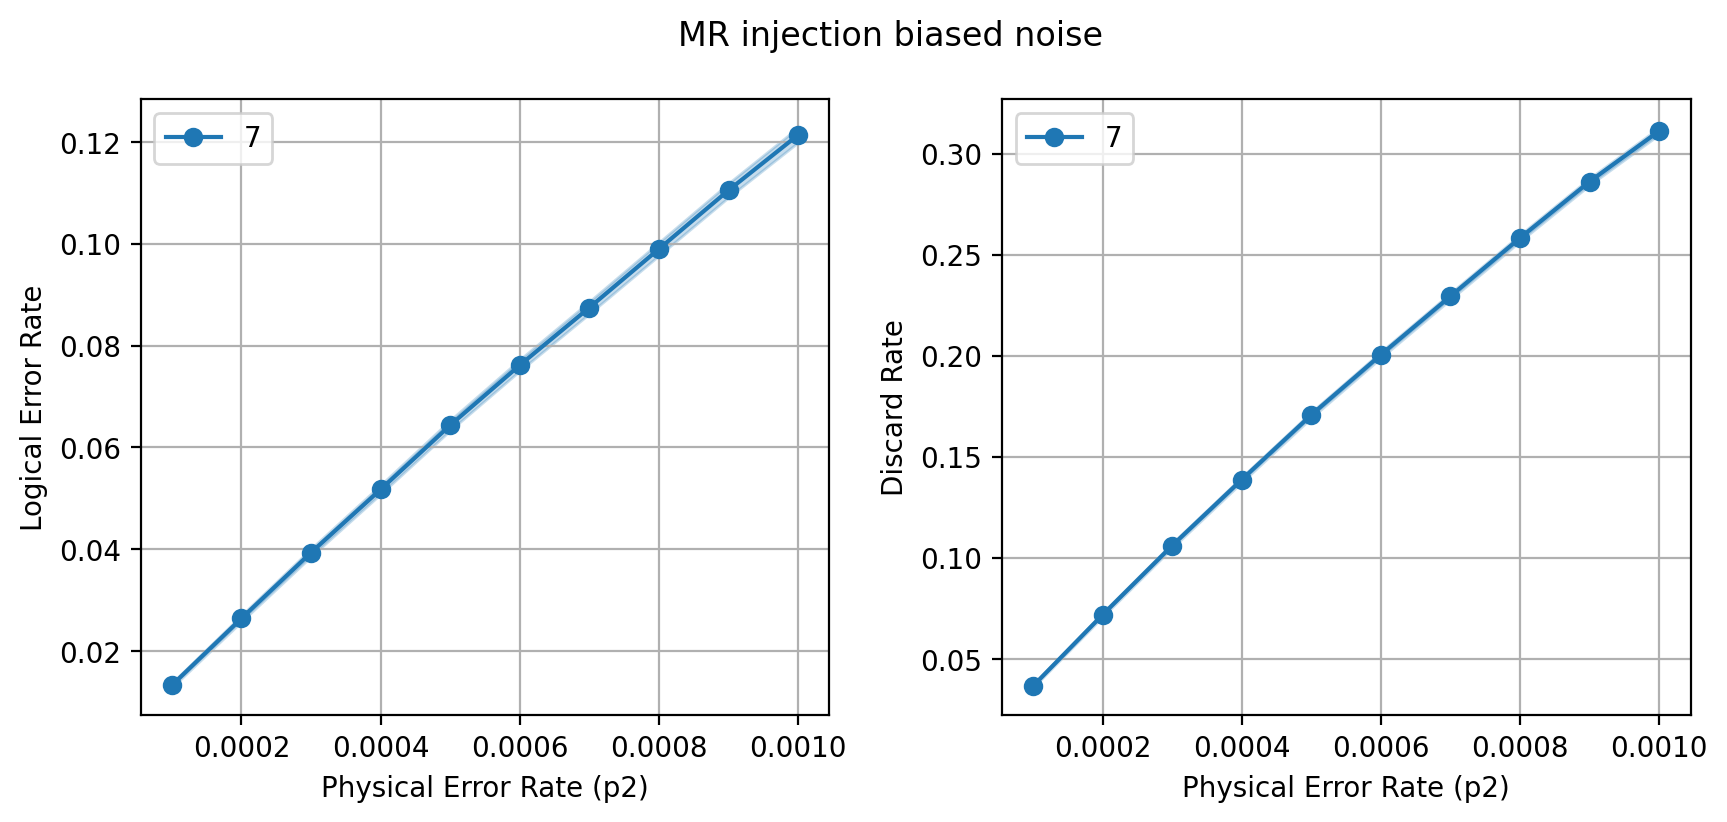

In [126]:
init_d = 7
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

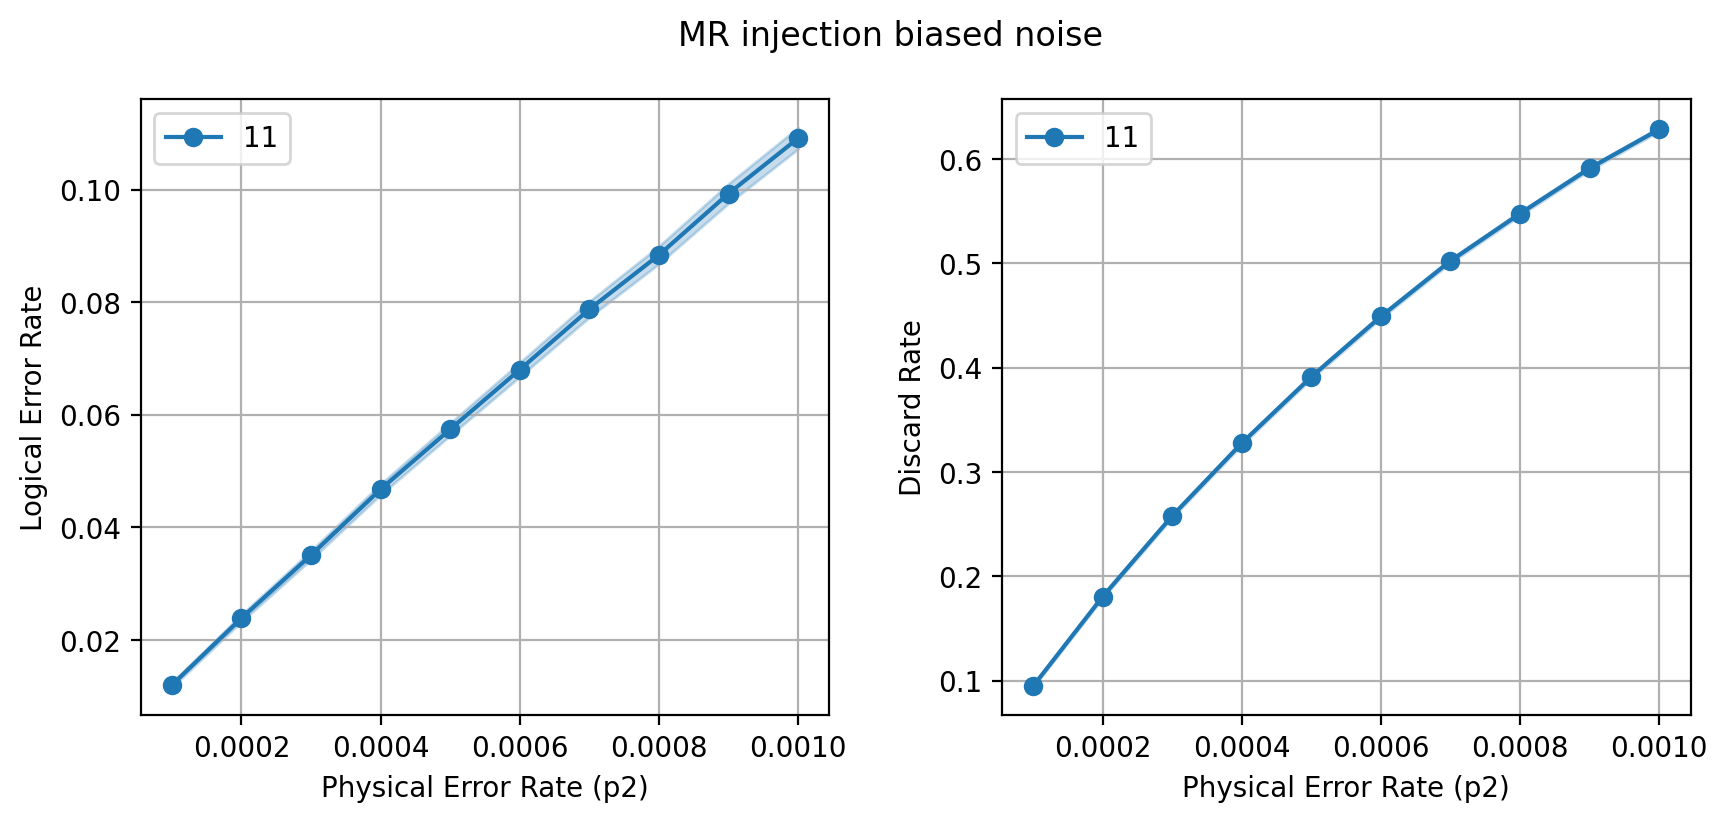

In [127]:
init_d = 11
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

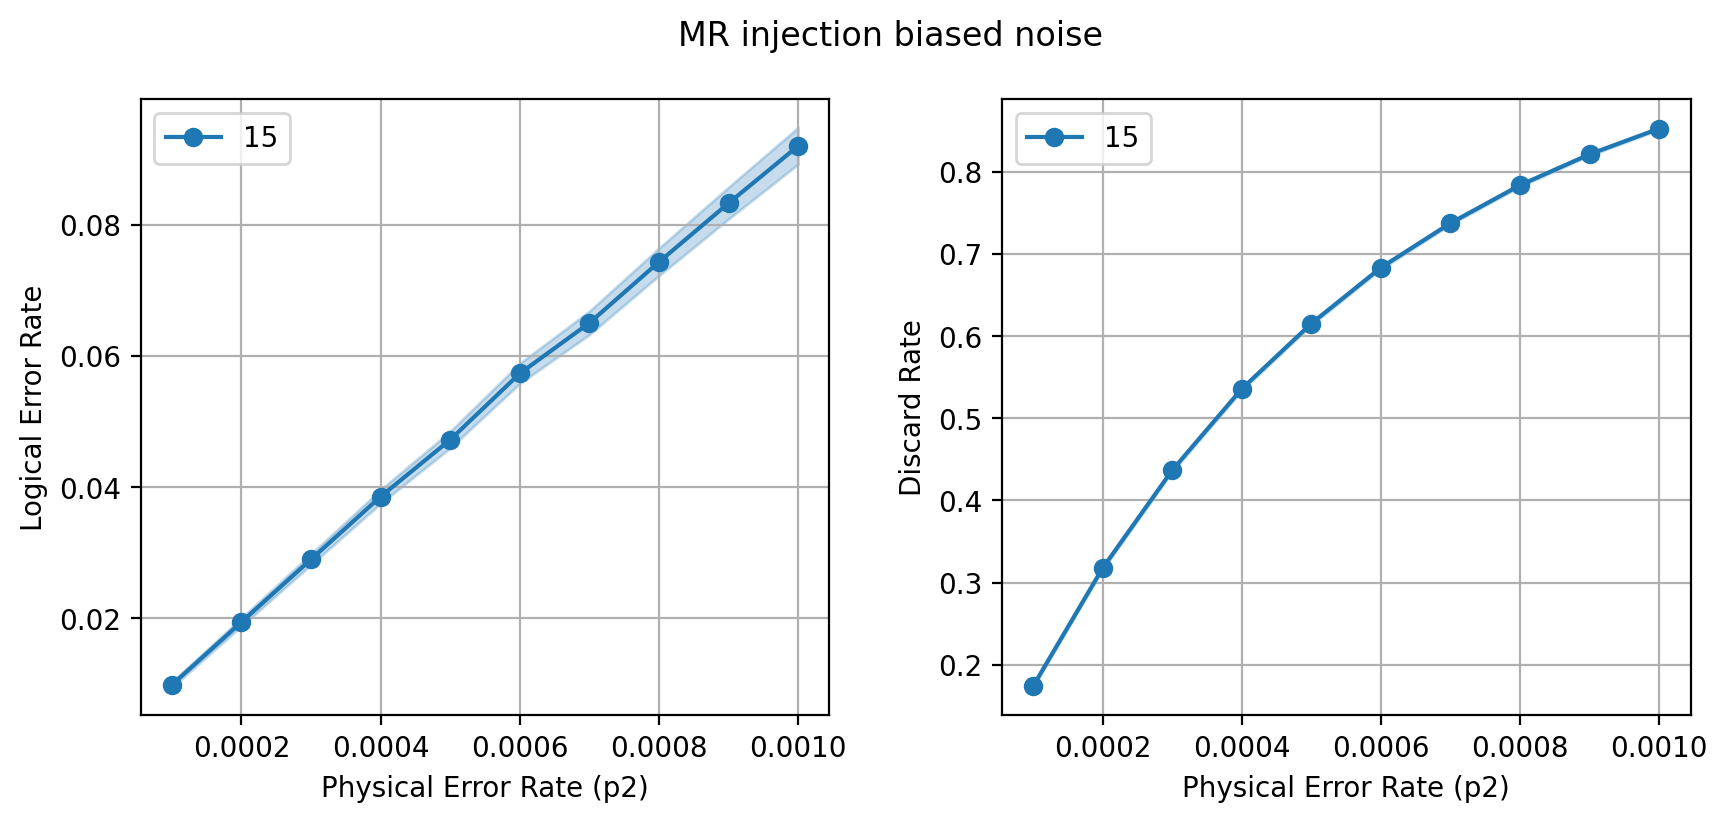

In [128]:
init_d = 15
target_d = 23 
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

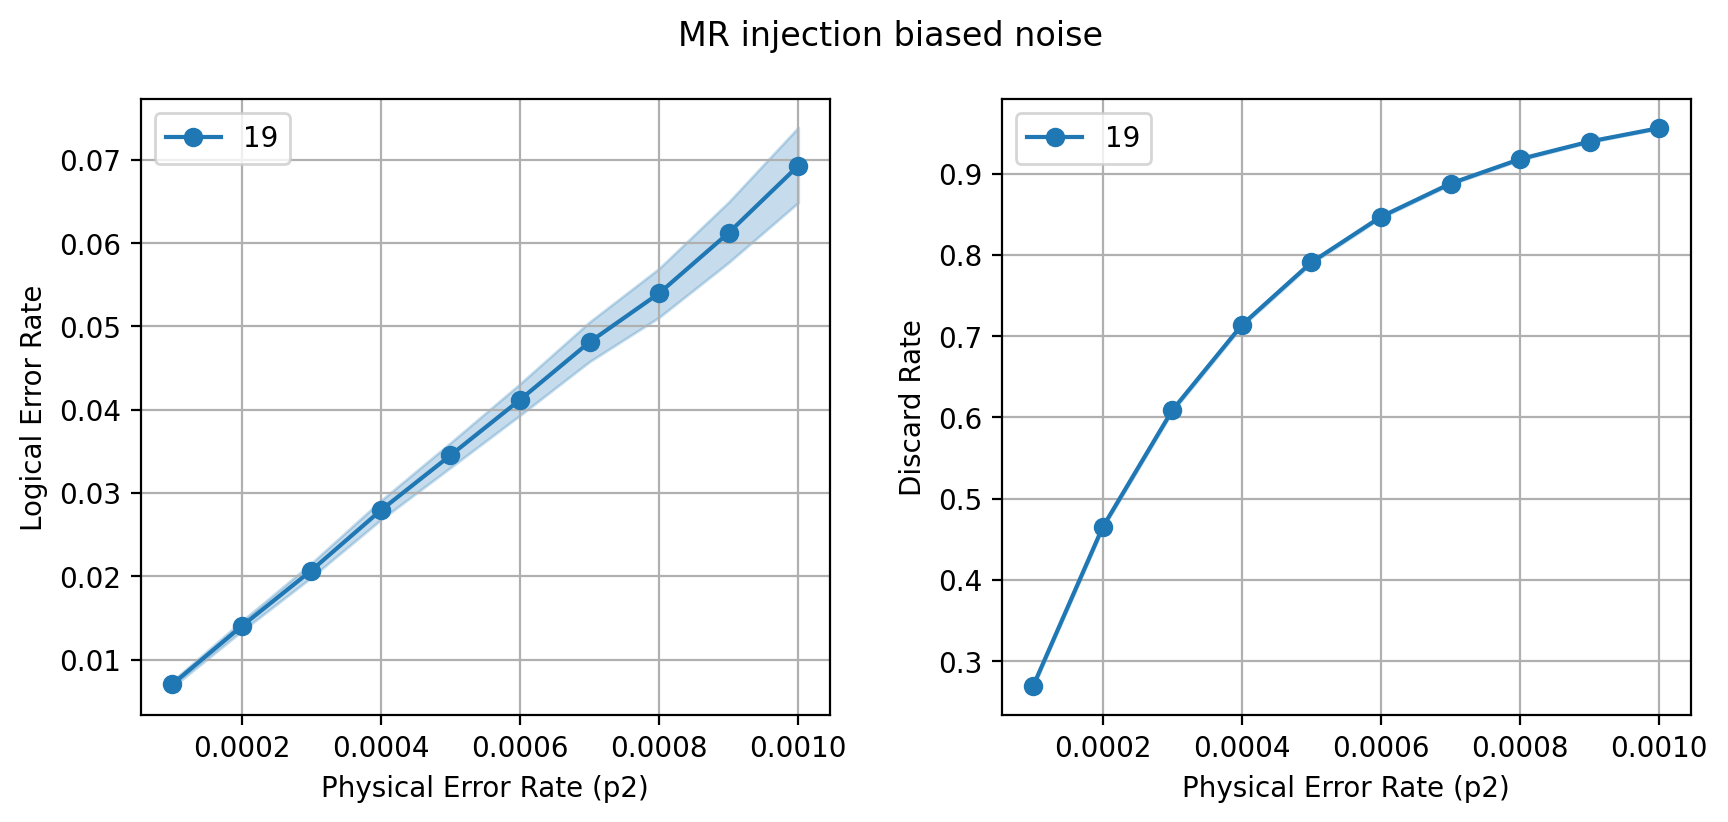

In [129]:
init_d = 19
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

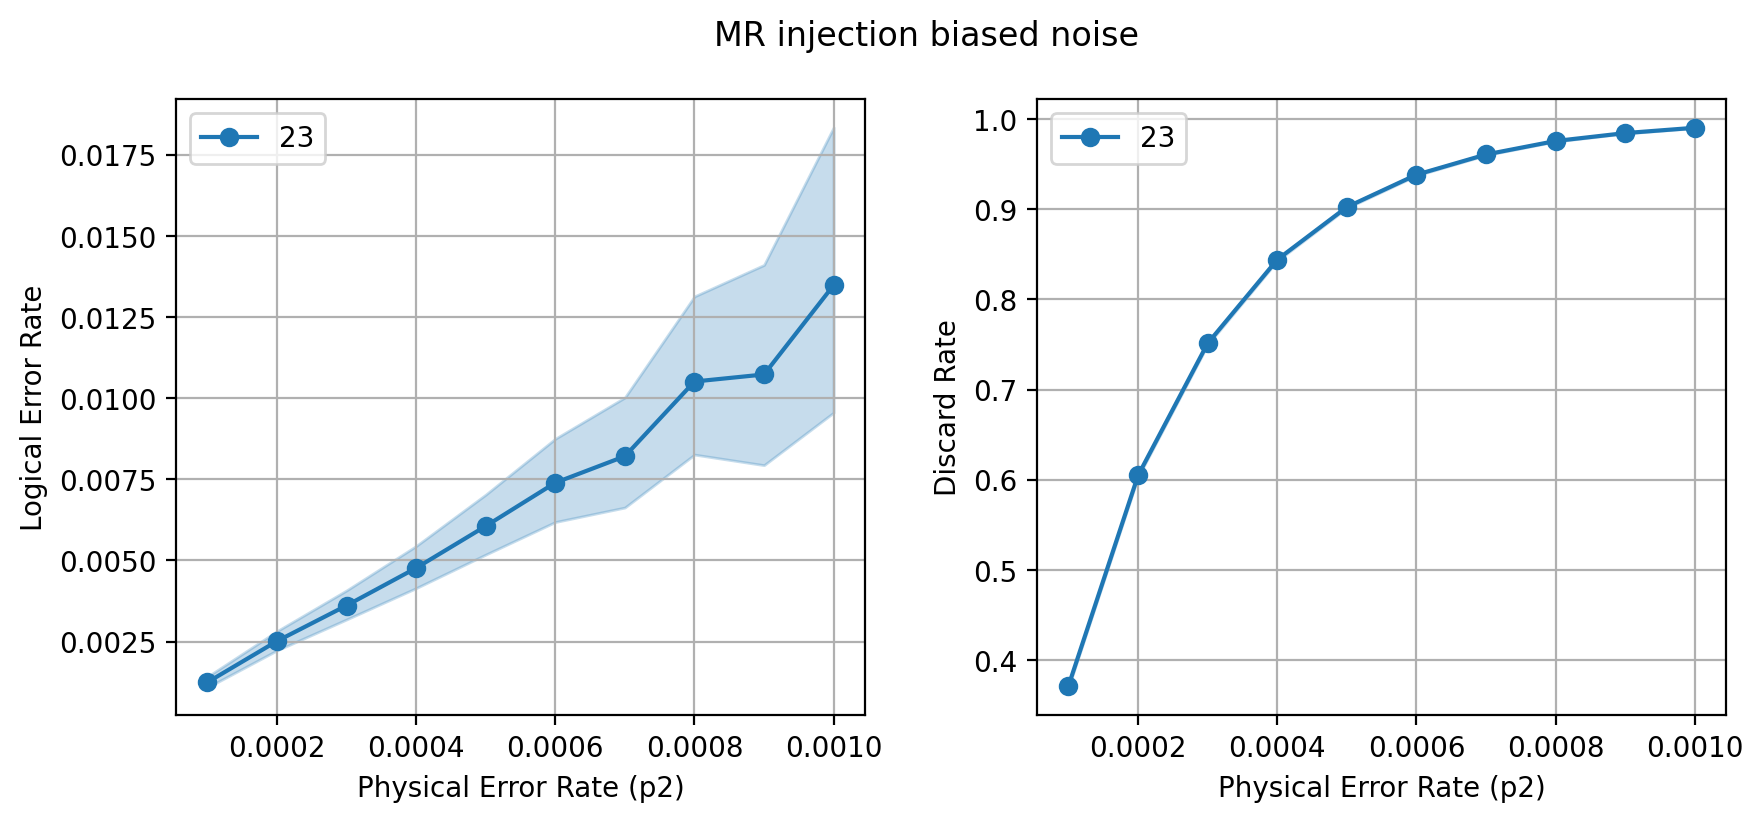

In [130]:
init_d = 23
target_d = 23
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='bell')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
growing.append(plot_LER_post_v2(circuit = circuit, dist=init_d, errs=linspace(0.1,1,10)*1e-3, filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det))

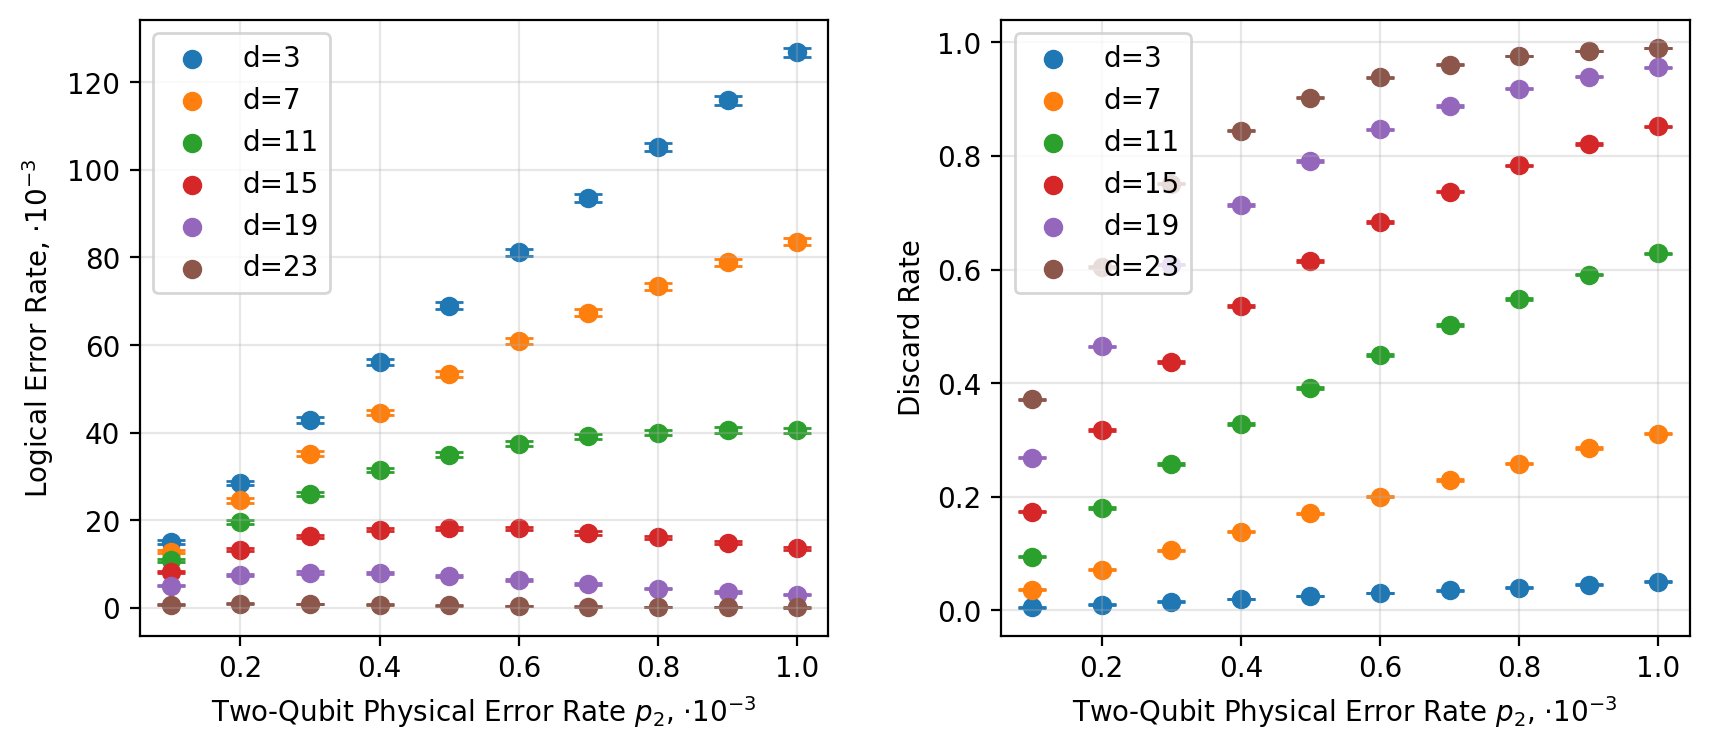

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.25)

ler = lambda a: a.errors/(a.shots-a.discards)
ler_err = lambda a: binom_error(a.errors, (a.shots-a.discards))
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']
# len(inj)
# dmax = 5
for i in range(len(growing)):
    b = growing[i]
    ax[0].scatter(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), label=f'd={i*4+3}', zorder=1, color=f'C{i}')
    ax[0].errorbar(1e3*array(list(map(probs, b))), 1e3*array(list(map(ler, b))), yerr=1e3*array(list(map(ler_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)
    
    ax[1].scatter(1e3*array(list(map(probs, b))), array(list(map(discs, b))), label=f'd={i*4+3}', zorder=1, color=f'C{i}')
    ax[1].errorbar(1e3*array(list(map(probs, b))), array(list(map(discs, b))), yerr=array(list(map(discs_err, b))), zorder=1, color=f'C{i}', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor')
# ax[0].set_ylim(0, 4.2)
ax[0].legend(loc='upper left')
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor')
ax[1].legend(loc='upper left')
# ax[1].set_ylim(-0.01, 0.65)
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig(f'Final_full.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_full.pdf', transparent=True, dpi=600, bbox_inches='tight')

In [104]:
import pickle
with open('growing_list.pkl', 'rb') as file:
    growing = pickle.load(file)

In [106]:
data_ler = zeros((10,6))
data_ler_err = zeros((10,6))
data_dr = zeros((10,6))
data_dr_err = zeros((10,6))

b = growing[0]
phys_err = array(list(map(probs, b)))
x_data = np.array([3,7,11,15,19,23])

for i in range(6):
    b = growing[i]
    for j in range(10):
        data_ler[j,i] = array(list(map(ler, b)))[j]
        data_ler_err[j,i] = array(list(map(ler_err, b)))[j]
        data_dr[j,i] = array(list(map(discs, b)))[j]
        data_dr_err[j,i] = array(list(map(discs_err, b)))[j]

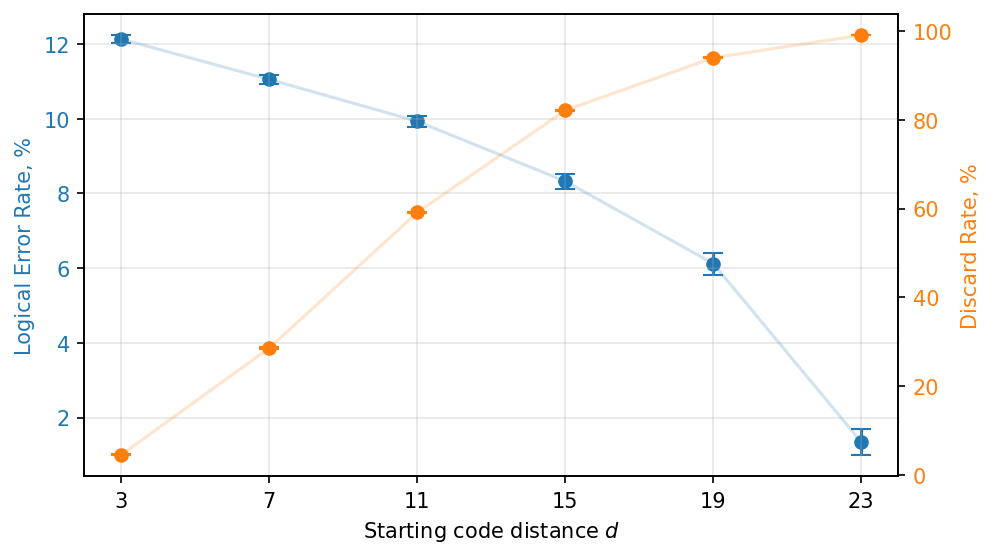

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
# plt.subplots_adjust(wspace=0.25)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data, 1e2*data_ler[i], '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x_data, 1e2*data_dr[i], '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off1.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off1.pdf', transparent=True, dpi=600, bbox_inches='tight')

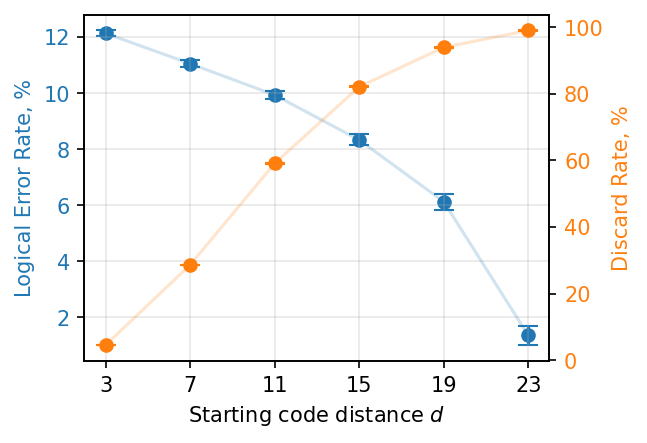

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data, 1e2*data_ler[i], '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x_data, 1e2*data_dr[i], '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap2.pdf', transparent=True, dpi=600, bbox_inches='tight')

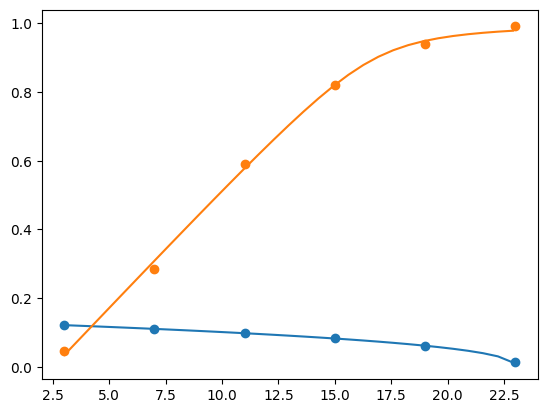

(array([14.19068006,  0.05035631,  2.49449757]),
 array([0.77725904, 0.02882006, 0.25802737]))

In [494]:
# def discard_func(x,a,x0,n):
#     return a*(1-exp(-(x-x0)/n))
# def discard_func(x,a,x0,n):
#     return 1/(1+(a/(x-x0))**n)
def discard_func1(x,a,k,x0):
    x1 = (x-x0)/a
    return 1/2*(sqrt(k+(x1+1)**2)-sqrt(k+(x1-1)**2))
    
def ler_func(x,a,r):
    return (23-x)**(r)*a

popt1, pcov1 = curve_fit(discard_func1, x_data, data_dr[-1], p0=[15,0.02,3])
popt2, pcov2 = curve_fit(ler_func, x_data, data_ler[-1], p0=[3.65e-2,0.4])

x = linspace(3,22.9,31)

i = -1
scatter(x_data, data_ler[i], color='C0')
plot(x, ler_func(x, *popt2), color='C0')
scatter(x_data, data_dr[i], color='C1')
plot(x, discard_func1(x, *popt1), color='C1')
# plot(x, discard_func2(x, *popt1), color='C1')
# plot(x, discard_func3(x, *popt1), color='C1')
# plot(x, discard_func4(x, *popt1), color='C1')
show()
popt1, sqrt(diag(pcov1))

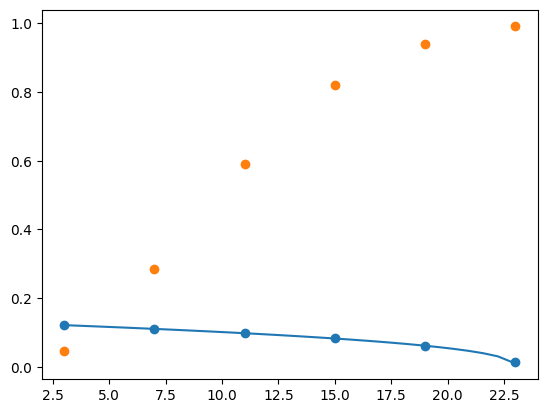

(array([ 23.36033801, -13.58360268,   7.8645378 ]),
 array([[ 124.12045853, -122.86532025,   40.8787313 ],
        [-122.86532025,  121.64988407,  -40.4654166 ],
        [  40.8787313 ,  -40.4654166 ,   13.61049533]]))

In [452]:
# def discard_func(x,a,x0,n):
#     return (x-x0)**n/((x-x0)**n+a**n)

def discard_func(x,a,x0,n):
    return 1/(1+(a/(x-x0))**n)
    
# def discard_func(x,a,x0):
#     return 1-a*log(1+e**(-x/x0))

# def discard_func2(x,a,x0,n):
#     return 1/(1+a*e**(-(x-x0)/n))

# def discard_func3(x,x0,n):
#     return 1-exp(-(x-x0)/n)#1/(1+a*e**(-(x-x0)/n))

# def discard_func4(x,x0,n):
#     return 1/2*(1+tanh((x-x0)/2/n))
    
def ler_func(x,a,r):
    return (23-x)**(r)*a

# popt1, pcov1 = curve_fit(discard_func, x_data, data_dr[-1], p0=[11,-1,3.5])
# popt1, pcov1 = curve_fit(discard_func, x_data, data_dr[-1], p0=[2,7])
# popt1, pcov1 = curve_fit(discard_func, x_data, data_dr[-1], p0=[11,-1,1])
# popt1, pcov1 = curve_fit(discard_func2, x_data, data_dr[-1], p0=[3,2,6])
# popt1, pcov1 = curve_fit(discard_func3, x_data, data_dr[-1], p0=[2,6])
# popt1, pcov1 = curve_fit(discard_func4, x_data, data_dr[-1], p0=[2,6])
popt2, pcov2 = curve_fit(ler_func, x_data, data_ler[-1], p0=[3.65e-2,0.4])

x = linspace(3,22.9,31)

i = -1
scatter(x_data, data_ler[i], color='C0')
plot(x, ler_func(x, *popt2), color='C0')
scatter(x_data, data_dr[i], color='C1')
# plot(x, discard_func(x, *popt1), color='C1')
# plot(x, discard_func2(x, *popt1), color='C1')
# plot(x, discard_func3(x, *popt1), color='C1')
# plot(x, discard_func4(x, *popt1), color='C1')
show()
popt1, pcov1

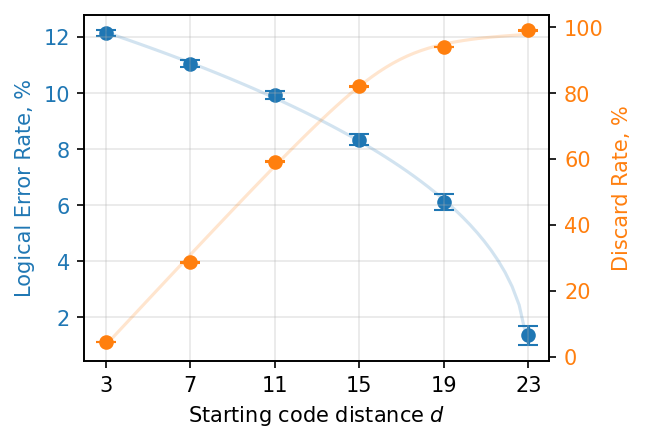

In [510]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)
x = linspace(3,22.9,61)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x, 1e2*ler_func(x, *popt2), '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x, 1e2*discard_func1(x, *popt1), '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)
# ax.set_yscale('log')
# ax2.set_yscale('log')

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap_fit2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap_fit2.pdf', transparent=True, dpi=600, bbox_inches='tight')

In [512]:
popt1, sqrt(diag(pcov1))

(array([14.19068006,  0.05035631,  2.49449757]),
 array([0.77725904, 0.02882006, 0.25802737]))

In [514]:
popt2, sqrt(diag(pcov2))

(array([0.03463121, 0.4196862 ]), array([0.00604832, 0.06683397]))

In [ ]:
1/2*(sqrt(k+(x1+1)**2)-sqrt(k+(x1-1)**2)) #discard_func1(x,a,k,x0)
(23-x)**(r)*a #ler_func(x,a,r)

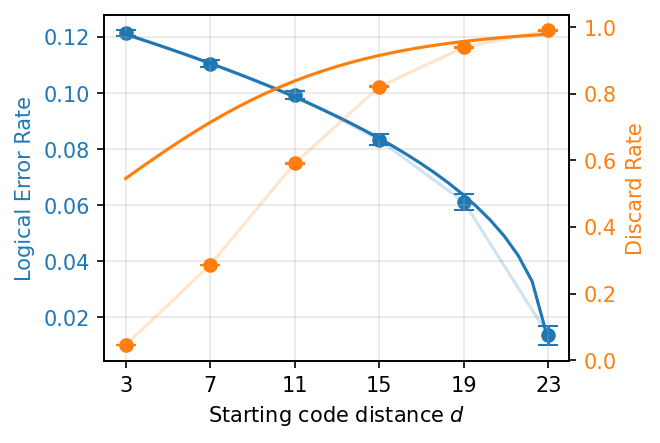

In [376]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)

i=-1
limit = 6 
ax.scatter(x_data[:limit], 1e0*data_ler[i][:limit], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data[:limit], 1e0*data_ler[i][:limit], '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data[:limit], 1e0*data_ler[i][:limit], yerr=1e0*data_ler_err[i][:limit], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data[:limit], 1e0*data_dr[i][:limit], zorder=1, color='C1')
ax2.plot(x_data[:limit], 1e0*data_dr[i][:limit], '-', alpha=0.2, color='C1')
ax2.errorbar(x_data[:limit], 1e0*data_dr[i][:limit], yerr=1e0*data_dr_err[i][:limit], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
x = linspace(3,22.9,31)
ax.plot(x, (23-x)**(0.4)*3.65e-2)
# a = 11; x0 = -1; n=3.5;
a = 3; x0 = 6; n=3.5;
# ax2.plot(x, 1-a**(-(x-2)/x0), color='C1')    
ax2.plot(x, 1/(1+a**(-(x-2)/x0)), color='C1')    
# ax2.plot(x, (x-x0)**n/((x-x0)**n+a**n), color='C1')    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)
# ax.loglog()
# ax.set_yscale('log')

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap2.pdf', transparent=True, dpi=600, bbox_inches='tight')

In [ ]:
1-exp(-x/x0)

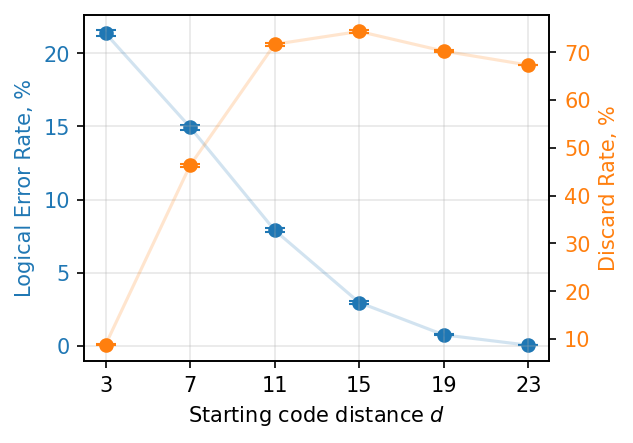

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# plt.subplots_adjust(wspace=0.25)

i=-1
ax.scatter(x_data, 1e2*bell_error(data_ler[i]), label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data, 1e2*bell_error(data_ler[i]), '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*bell_error(data_ler[i]), yerr=2e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*bell_error(data_dr[i]), zorder=1, color='C1')
ax2.plot(x_data, 1e2*bell_error(data_dr[i]), '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*bell_error(data_dr[i]), yerr=2e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off_pap.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off_pap.pdf', transparent=True, dpi=600, bbox_inches='tight')

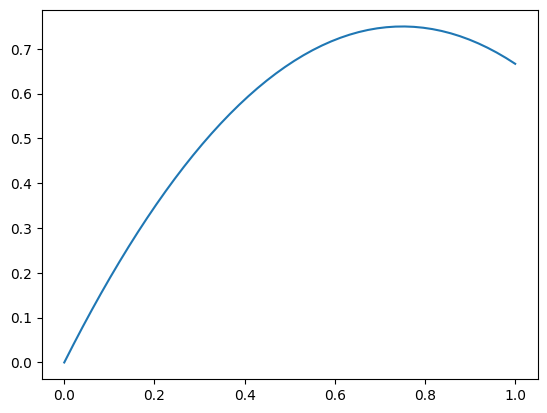

In [69]:
p = linspace(0,1)
plot(p, 2*p-4/3*p**2)
show()

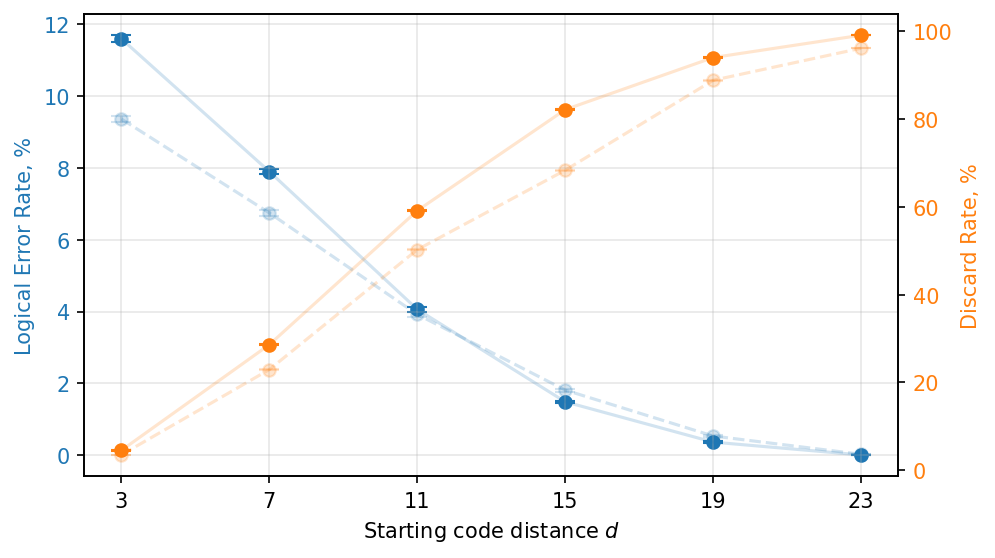

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
# plt.subplots_adjust(wspace=0.25)

i=-1
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.1%', zorder=1, color=f'C0')
ax.plot(x_data, 1e2*data_ler[i], '-', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5)
ax2 = ax.twinx()
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1')
ax2.plot(x_data, 1e2*data_dr[i], '-', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5)

i=-4
ax.scatter(x_data, 1e2*data_ler[i], label='$p_2$=0.05%', zorder=1, color=f'C0', alpha=0.2)
ax.plot(x_data, 1e2*data_ler[i], '--', alpha=0.2, color=f'C0')
ax.errorbar(x_data, 1e2*data_ler[i], yerr=1e2*data_ler_err[i], zorder=1, color=f'C0', fmt='none', capsize=5, alpha=0.2)
ax2.scatter(x_data, 1e2*data_dr[i], zorder=1, color='C1', alpha=0.2)
ax2.plot(x_data, 1e2*data_dr[i], '--', alpha=0.2, color='C1')
ax2.errorbar(x_data, 1e2*data_dr[i], yerr=1e2*data_dr_err[i], zorder=1, color='C1', fmt='none', capsize=5, alpha=0.2)

# ax2.plot(x, y2, color='C1', label='x^2')
ax2.set_ylabel('Discard Rate, %', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
    
# fig.suptitle('Injection biased noise', fontsize=12)
ax.set_xlabel("Starting code distance $d$")
ax.set_ylabel("Logical Error Rate, %", color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor')
# ax[0].set_ylim(0, 4.2)
# ax.legend(loc='upper center')
ax.set_xticks(x_data)

fig.set_dpi(150)  # Show it bigger
show()
# fig.savefig(f'Final_trade_off2.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig(f'Final_trade_off2.pdf', transparent=True, dpi=600, bbox_inches='tight')

## Distance scaling problem

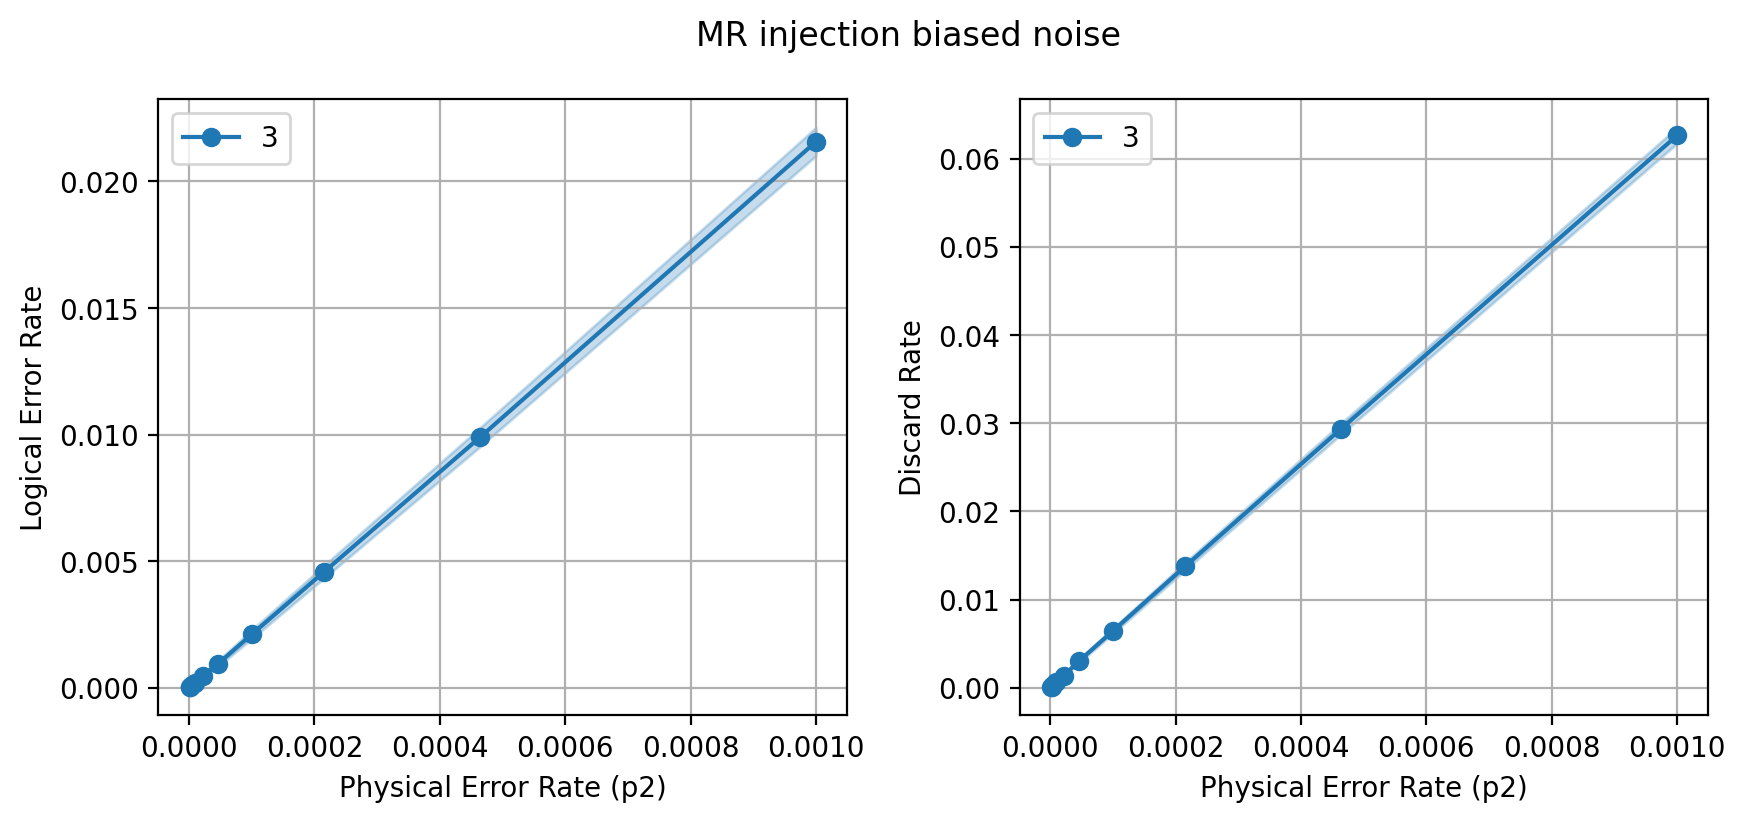

In [242]:
init_d = 3
target_d = 5 # logspace(0.1,1,10)
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='zero')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
g1 = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=logspace(-6,-3,10), filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)

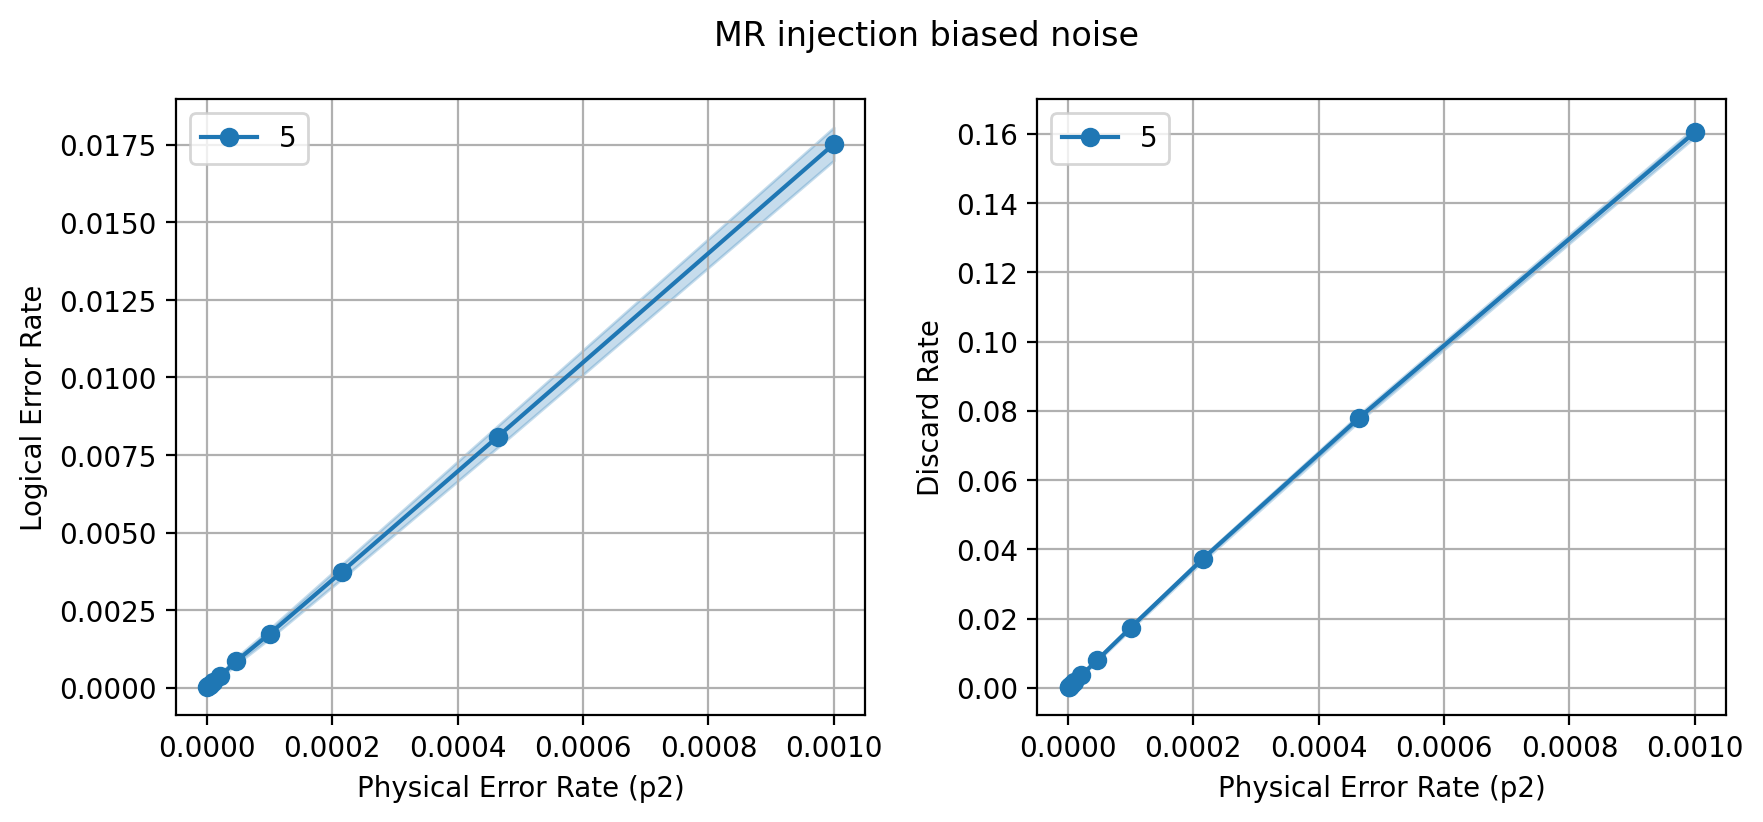

In [243]:
init_d = 5
target_d = 7
circuit = write_inject_grow_code(init_d=init_d, target_d=target_d, start='zero')
bitmask_det = bitmask_for_postselection_circ(stim.Circuit(circuit), init_d=init_d)
g2 = plot_LER_post_v2(circuit = circuit, dist=init_d, errs=logspace(-6,-3,10), filename='stats.csv', noise_type='biased',
                             bit_packed_array_for_this_circ_dets = bitmask_det)

In [264]:
from scipy.optimize import curve_fit
# def func(x, a, b, r):
#     return a*x**r+b

def func(x, r, b):
    return r*log(x*b)

xdata1 = array(list(map(probs, a)))
ydata1 = array(list(map(ler, a)))
sorted_indices = np.argsort(xdata1)
xdata1 = xdata1[sorted_indices]
ydata1 = ydata1[sorted_indices]
popt1, pcov1 = curve_fit(func, (xdata1), log(ydata1), p0=[1,1])

xdata2 = array(list(map(probs, c)))
ydata2 = array(list(map(ler, c)))
sorted_indices = np.argsort(xdata2)
xdata2 = xdata2[sorted_indices]
ydata2 = ydata2[sorted_indices]
popt2, pcov2 = curve_fit(func, (xdata2), log(ydata2), p0=[1,1])
# popt2, pcov2 = curve_fit(func, xdata2, ydata2, p0=[1,0,1])

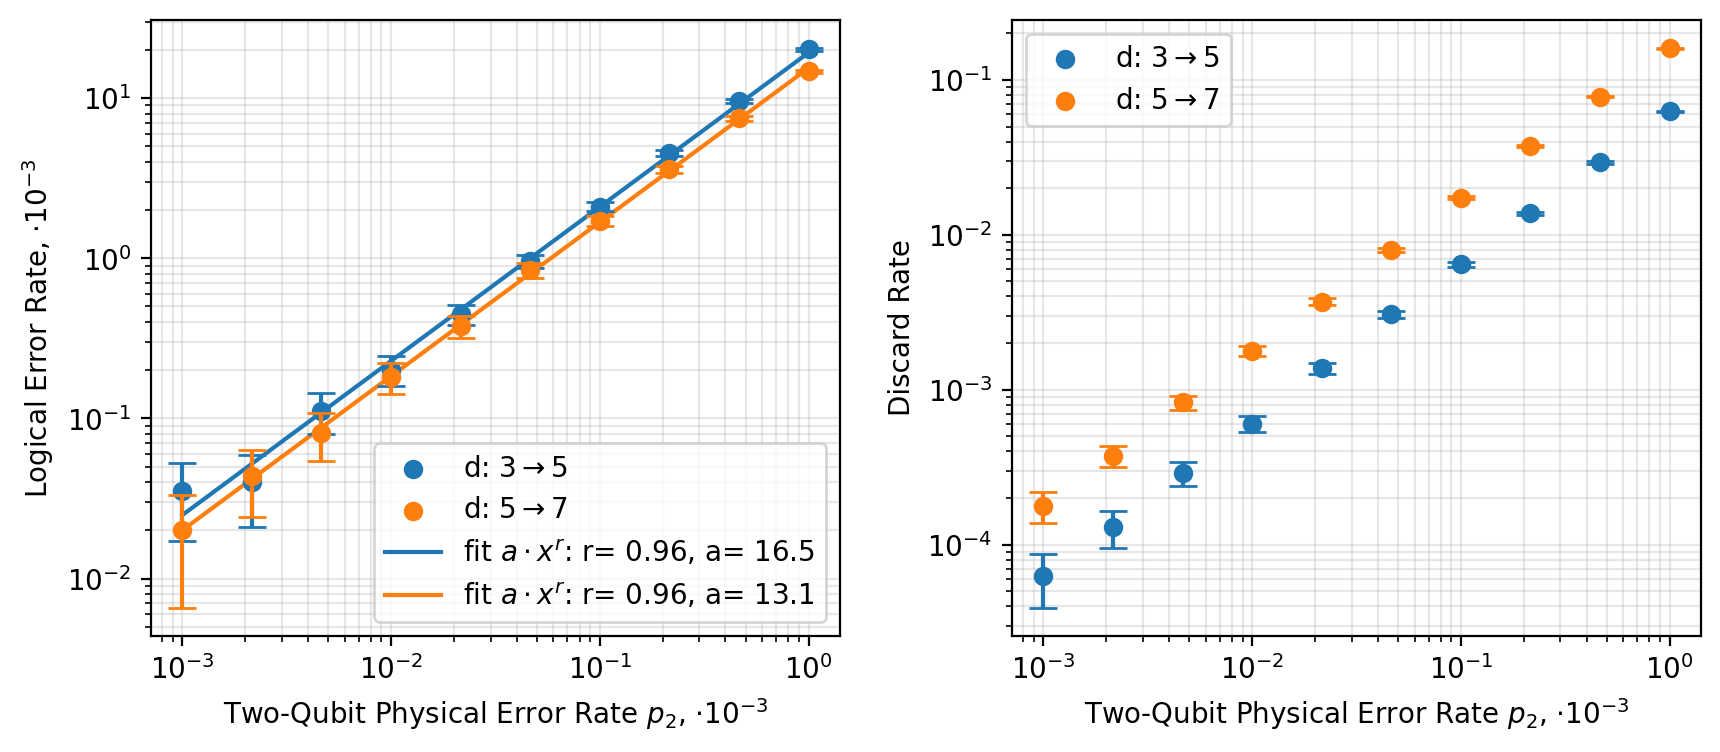

In [268]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.25)

a = g1
c = g2

ler = lambda a: a.errors/a.shots
ler_err = lambda a: binom_error(a.errors, a.shots)
discs = lambda a: a.discards/a.shots
discs_err = lambda a: binom_error(a.discards, a.shots)
probs = lambda a: a.json_metadata['p']

ax[0].scatter(1e3*array(list(map(probs, a))), 1e3*array(list(map(ler, a))), label='d: 3$\\rightarrow$5', zorder=10, color='C0')
ax[0].errorbar(1e3*array(list(map(probs, a))), 1e3*array(list(map(ler, a))), yerr=1e3*array(list(map(ler_err, a))), zorder=10, color='C0', fmt='none', capsize=5)
ax[0].scatter(1e3*array(list(map(probs, c))), 1e3*array(list(map(ler, c))), label='d: 5$\\rightarrow$7', zorder=10, color='C1')
ax[0].errorbar(1e3*array(list(map(probs, c))), 1e3*array(list(map(ler, c))), yerr=1e3*array(list(map(ler_err, c))), zorder=10, color='C1', fmt='none', capsize=5)
ax[0].plot(1e3*xdata1, 1e3*exp(func((xdata1), *popt1)), color='C0', label='fit $a \\cdot x^r$: r=%5.2f, a=%5.1f' % tuple(popt1))
ax[0].plot(1e3*xdata2, 1e3*exp(func((xdata1), *popt2)), color='C1', label='fit $a \\cdot x^r$: r=%5.2f, a=%5.1f' % tuple(popt2))
# ax[0].plot(1e3*xdata2, 1e3*func(log(xdata1), *popt2), color='C1', label='fit $ax^r+b$: a=%5.1f, b=%5.1f, r=%5.2f' % tuple(popt2))

ax[1].scatter(1e3*array(list(map(probs, a))), array(list(map(discs, a))), label='d: 3$\\rightarrow$5', zorder=10, color='C0')
ax[1].errorbar(1e3*array(list(map(probs, a))), array(list(map(discs, a))), yerr=array(list(map(discs_err, a))), zorder=10, color='C0', fmt='none', capsize=5)
ax[1].scatter(1e3*array(list(map(probs, c))), array(list(map(discs, c))), label='d: 5$\\rightarrow$7', zorder=10, color='C1')
ax[1].errorbar(1e3*array(list(map(probs, c))), array(list(map(discs, c))), yerr=array(list(map(discs_err, c))), zorder=10, color='C1', fmt='none', capsize=5)

# fig.suptitle('Injection biased noise', fontsize=12)
ax[0].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[0].set_ylabel("Logical Error Rate, $\\cdot$10$^{-3}$")
ax[0].grid(which='major', alpha=0.3)
ax[0].grid(which='minor', alpha=0.3)
ax[0].legend()
# ax[1].set_ylim(0,0.3)
ax[1].set_xlabel("Two-Qubit Physical Error Rate $p_2$, $\\cdot$10$^{-3}$")
ax[1].set_ylabel("Discard Rate")
ax[1].grid(which='major', alpha=0.3)
ax[1].grid(which='minor', alpha=0.3)
ax[1].legend()
ax[0].loglog()
ax[1].loglog()
fig.set_dpi(200)  # Show it bigger
show()
# fig.savefig('distance_scaling.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('distance_scaling.pdf', transparent=True, dpi=600, bbox_inches='tight')